## Scraping Data and Cleaning, Skip to SQL DB Section

In [194]:
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np

In [67]:
# player_store = []

# for i in range(2000, 2018):
#     url = "https://www.pro-football-reference.com/years/" + str(i) + "/receiving.htm"
#     page = requests.get(url)
#     soup = BeautifulSoup(page.content, 'html.parser')
    
#     stats_table = soup.find(id="all_receiving")
#     players = stats_table.find_all("tr")

#     for player in players:
#         player = player.find_all("td")

#         row = {}

#         try:
#             row['name'] = player[0].get_text()
#             row['demo_link'] = player[0].find('a')['href']
#             row['team'] = player[1].get_text()
#             row['age'] = player[2].get_text()
#             row['position'] = player[3].get_text()
#             row['games'] = player[4].get_text()
#             row['games_start'] = player[5].get_text()
#             row['targets'] = player[6].get_text()
#             row['receptions'] = player[7].get_text()
#             row['catch_pct'] = player[8].get_text()
#             row['rec_yards'] = player[9].get_text()
#             row['yards_per_rec'] = player[10].get_text()
#             row['td'] = player[11].get_text()
#             row['longest_rec'] = player[12].get_text()
#             row['rec_per_game'] = player[13].get_text()
#             row['rec_yards_per_game'] = player[14].get_text()
#             row['fumble'] = player[15].get_text()

#             player_store.append(row)

#         except:
#             print("Ran into header row.")

Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into head

In [150]:
# for i, player in enumerate(player_store):
    
#     if i % 100 == 0:
#         print(i)
        
#     if "height" in player.keys():
#         continue
        
#     url = "https://www.pro-football-reference.com/" + str(player['demo_link'])
#     page = requests.get(url)
#     soup = BeautifulSoup(page.content, 'html.parser')
    
#     try:
#         player_store[i]['height'] = soup.find(itemprop="height").get_text()
#         player_store[i]['weight'] = soup.find(itemprop="weight").get_text()
        
#     except:
#         print("No demographic info")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
No demographic info
6000
6100
6200
6300
6400
No demographic info
No demographic info
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


In [86]:
# pickle.dump(df, open("player_df.p", "wb" ) )

# Clean Data

In [87]:
df = pickle.load(open("player_df.p", "rb" ) )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 19 columns):
age                   7833 non-null object
catch_pct             7833 non-null object
demo_link             7833 non-null object
fumble                7833 non-null object
games                 7833 non-null object
games_start           7833 non-null object
height                5948 non-null object
longest_rec           7833 non-null object
name                  7833 non-null object
position              7833 non-null object
rec_per_game          7833 non-null object
rec_yards             7833 non-null object
rec_yards_per_game    7833 non-null object
receptions            7833 non-null object
targets               7833 non-null object
td                    7833 non-null object
team                  7833 non-null object
weight                5948 non-null object
yards_per_rec         7833 non-null object
dtypes: object(19)
memory usage: 1.1+ MB


In [189]:
def convert_numeric(row, col):
    try:
        val = float(row[col])
        return val
    except:
        print(row[col])
        return np.nan

def lowercase(row, col):
    try:
        val = row[col].lower()
        return val
    except:
        print(row[col])
        return np.nan

def clean_string(row, col, char):
    try:
        val = row[col].strip(char)
        return val
    except:
        print(row[col])
        return np.nan
    
def convert_height(row, col):
    try:
        val = row[col].split("-")
        val = int(val[0]) * 12 + int(val[1])
        return val
    except:
        print(row[col])
        return np.nan

string_clean = {"catch_pct": "%", "weight": "lb", "name": "*+"}
floats = ["age", "fumble", "games", "games_start", "longest_rec", "rec_per_game", \
         "rec_yards", "rec_yards_per_game", "receptions", "targets", "td", \
          "yards_per_rec", "catch_pct", "weight", "height"]    
lower = ["team", "position"]

In [191]:
cleaned_df["height"] = cleaned_df.apply(lambda x: convert_height(x, "height"), 1)

In [192]:
for k, v in string_clean.items():
    cleaned_df[k] = cleaned_df.apply(lambda x: clean_string(x, k, v), 1)

In [193]:
for col in floats:
    cleaned_df[col] = cleaned_df.apply(lambda x: convert_numeric(x, col), 1)

In [194]:
for col in lower:
    cleaned_df[col] = cleaned_df.apply(lambda x: lowercase(x, col), 1)

In [195]:
cleaned_df.head()

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,wr,6.4,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9
1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,wr,6.4,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6
2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,wr,6.3,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0
3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,wr,6.3,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0
4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,wr,6.9,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0


In [196]:
cleaned_df.tail()

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
7828,23.0,100.0,/players/W/WashDw00.htm,0.0,3.0,0.0,73.0,4.0,Dwayne Washington,,0.3,4.0,1.3,1.0,1.0,0.0,det,221.0,4.0
7829,32.0,50.0,/players/W/WeemEr00.htm,0.0,8.0,0.0,68.0,5.0,Eric Weems,,0.1,5.0,0.6,1.0,2.0,0.0,ten,182.0,5.0
7830,26.0,11.1,/players/W/WheaMa00.htm,0.0,3.0,0.0,71.0,4.0,Markus Wheaton,,0.3,4.0,1.3,1.0,9.0,0.0,chi,189.0,4.0
7831,26.0,100.0,/players/W/WillMa03.htm,0.0,8.0,0.0,71.0,31.0,Marcus Williams,,0.1,31.0,3.9,1.0,1.0,0.0,2tm,196.0,31.0
7832,27.0,100.0,/players/Z/ZeitKe00.htm,0.0,8.0,8.0,76.0,-4.0,Kevin Zeitler,rg,0.1,-4.0,-0.5,1.0,1.0,0.0,cle,315.0,-4.0


In [197]:
cleaned_df.describe()

,age,catch_pct,fumble,games,games_start,height,longest_rec,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,weight,yards_per_rec
count,7808.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.00000,7830.000000,7830.000000,7826.000000,7830.000000,7830.000000,7830.000000
mean,26.355917,65.361520,0.855428,12.384036,5.949936,73.124521,30.261558,1.785249,267.25198,20.263768,23.246488,37.617174,1.609195,220.933589,10.370179
std,3.162964,17.763348,1.496551,4.234266,5.678516,2.826430,20.184480,1.589293,316.68150,21.204588,23.908713,38.914467,2.444796,27.457719,5.211456
min,21.000000,0.000000,0.000000,1.000000,0.000000,65.000000,-16.000000,0.100000,-16.00000,-5.000000,1.000000,0.000000,0.000000,150.000000,-16.000000
25%,24.000000,53.600000,0.000000,9.000000,1.000000,71.000000,15.000000,0.500000,40.00000,4.125000,5.000000,8.000000,0.000000,200.000000,7.200000
50%,26.000000,64.300000,0.000000,14.000000,4.000000,73.000000,26.000000,1.300000,138.00000,12.300000,15.000000,23.000000,1.000000,216.000000,10.100000
75%,28.000000,75.000000,1.000000,16.000000,11.000000,75.000000,43.000000,2.700000,384.00000,29.900000,35.000000,56.000000,2.000000,244.000000,13.000000
max,42.000000,100.000000,23.000000,17.000000,16.000000,80.000000,99.000000,8.900000,1964.00000,122.800000,143.000000,205.000000,23.000000,336.000000,81.000000


In [199]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7830 entries, 0 to 7832
Data columns (total 19 columns):
age                   7808 non-null float64
catch_pct             7830 non-null float64
demo_link             7830 non-null object
fumble                7830 non-null float64
games                 7830 non-null float64
games_start           7830 non-null float64
height                7830 non-null float64
longest_rec           7830 non-null float64
name                  7830 non-null object
position              7830 non-null object
rec_per_game          7830 non-null float64
rec_yards             7830 non-null float64
rec_yards_per_game    7830 non-null float64
receptions            7830 non-null float64
targets               7826 non-null float64
td                    7830 non-null float64
team                  7830 non-null object
weight                7830 non-null float64
yards_per_rec         7830 non-null float64
dtypes: float64(15), object(4)
memory usage: 1.2+ MB


In [ ]:
# Create SQL DB
# import sqlite3

# conn = sqlite3.connect("nfl.db")
# cleaned_df.to_sql("wide_receivers", conn, if_exists="replace")

# Query SQL DB + EDA

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("nfl.db")
df = pd.read_sql_query("select * from wide_receivers;", conn)

In [4]:
df.head()

,index,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,wr,6.4,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9
1,1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,wr,6.4,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6
2,2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,wr,6.3,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0
3,3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,wr,6.3,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0
4,4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,wr,6.9,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0


In [5]:
df['targets_per_game'] = df['targets'] / df['games']

### Data Dictionary

    age: Player's age on December 31st of that year
    weight: Player's weight in pounds
    height: Player's height in inches
    position: Position in
    games: Games played
    games_start: Games started as an offensive or defensive player

    targets: Pass targets
    rec: Receptions
    catch_pct: Receptions divided by targets
    rec_per_game: Receptions per game
    longest_rec: Longest reception

    rec_yards: Receiving yards
    yards_per_rec: Receiving yards per reception
    rec_yards_per_game: Receiving yards per game
    td: Receiving touchdowns
    
    fumbles: Number of times fumbled

In [195]:
# Imports

%matplotlib inline 
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_context("poster", font_scale=1.1)
sns.set_style('white', {'grid.color': '1.0'})

from scipy import stats

import pivottablejs
import missingno as msno
import pandas_profiling

### Descriptive Statistics

In [7]:
df.shape

(7830, 21)

In [8]:
df.isnull().sum()

index                  0
age                   22
catch_pct              0
demo_link              0
fumble                 0
games                  0
games_start            0
height                 0
longest_rec            0
name                   0
position               0
rec_per_game           0
rec_yards              0
rec_yards_per_game     0
receptions             0
targets                4
td                     0
team                   0
weight                 0
yards_per_rec          0
targets_per_game       4
dtype: int64

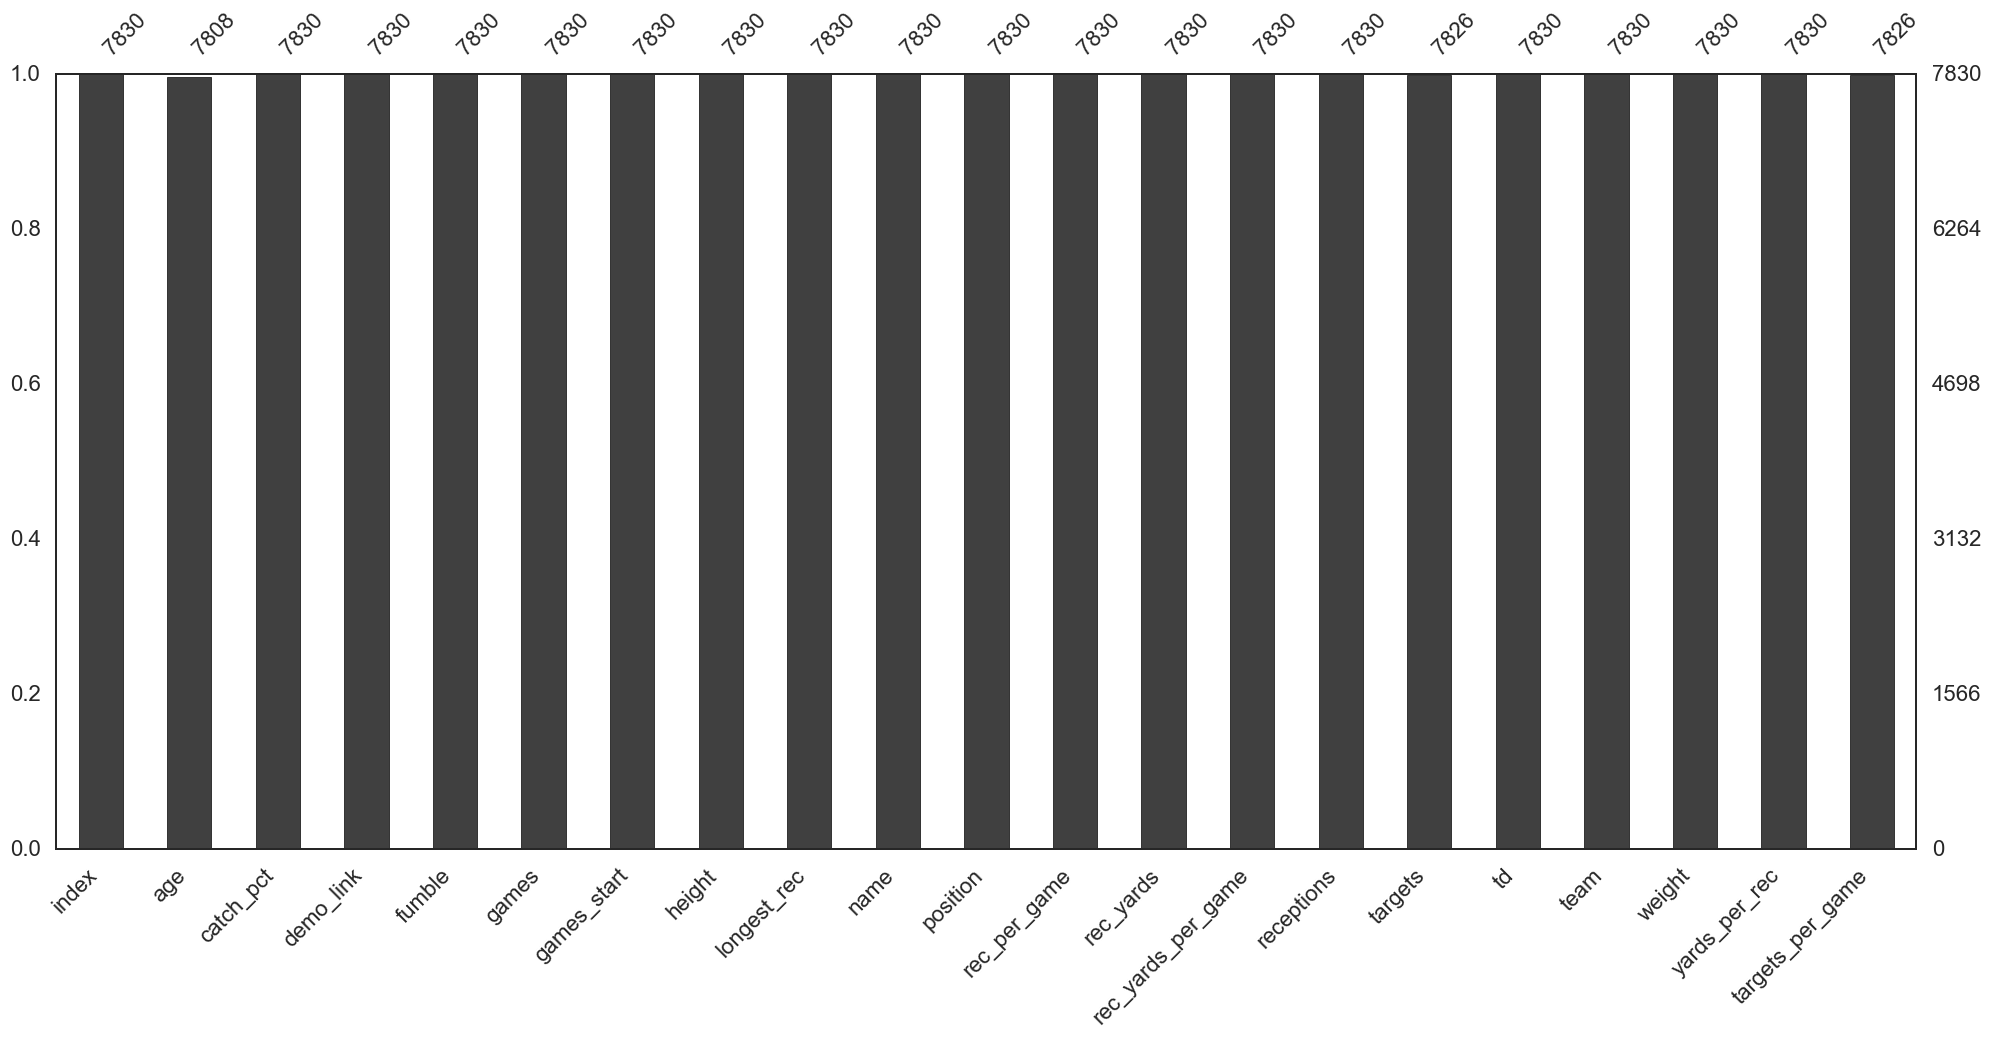

In [9]:
msno.bar(df, labels=True)

In [10]:
pivottablejs.pivot_ui(df)

In [11]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,7830
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,168.0 B
Numeric,13
Categorical,4
Date,0
Text (Unique),0
Rejected,4
Distinct count,23


I will have to decide on a certain set of filters for modeling, such as to only examine players who are true wide receiver position players vs. running backs or tight ends that get many targets or to only examine players with a minimum threshold of targets per game.

### Location and Spread

In [12]:
cols = {'weight': 'Weight', 'height': 'Height', 'rec_per_game': "Receptions per Game",
     'yards_per_rec': 'Yards per Reception', 'catch_pct': 'Catch %',
     'targets_per_game': 'Targets per Game', 'rec_yards_per_game': 'Receiving Yards per Game'}

col_list = list(cols.keys())

In [13]:
df[col_list].describe()

,catch_pct,rec_yards_per_game,rec_per_game,weight,height,targets_per_game,yards_per_rec
count,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7826.000000,7830.000000
mean,65.361520,20.263768,1.785249,220.933589,73.124521,2.879348,10.370179
std,17.763348,21.204588,1.589293,27.457719,2.826430,2.581166,5.211456
min,0.000000,-5.000000,0.100000,150.000000,65.000000,0.000000,-16.000000
25%,53.600000,4.125000,0.500000,200.000000,71.000000,0.800000,7.200000
50%,64.300000,12.300000,1.300000,216.000000,73.000000,2.000000,10.100000
75%,75.000000,29.900000,2.700000,244.000000,75.000000,4.375000,13.000000
max,100.000000,122.800000,8.900000,336.000000,80.000000,13.142857,81.000000


The interquartile range for most variables is quite small, compared to the overall range. It seems that there is a typical profile of wide recievers and then a few outliers thatare much better or much worse.

### Shape

In [14]:
df[col_list].apply(stats.skew)

catch_pct             0.183946
rec_yards_per_game    1.419464
rec_per_game          1.110845
weight                0.448494
height                0.043108
targets_per_game           NaN
yards_per_rec         1.735189
dtype: float64

In [15]:
df[col_list].apply(stats.kurtosis)

catch_pct              0.016496
rec_yards_per_game     1.580229
rec_per_game           0.645756
weight                -0.098816
height                -0.737083
targets_per_game            NaN
yards_per_rec         14.531869
dtype: float64

In [16]:
def make_histogram(col, title, bins=50):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.hist(df[col].dropna().values, bins=bins);
    ax.set_xlabel(title);
    ax.set_ylabel('Number of Players');
    ax.set_title(title + ' Distribution of Wide Receivers from 2000-2017');

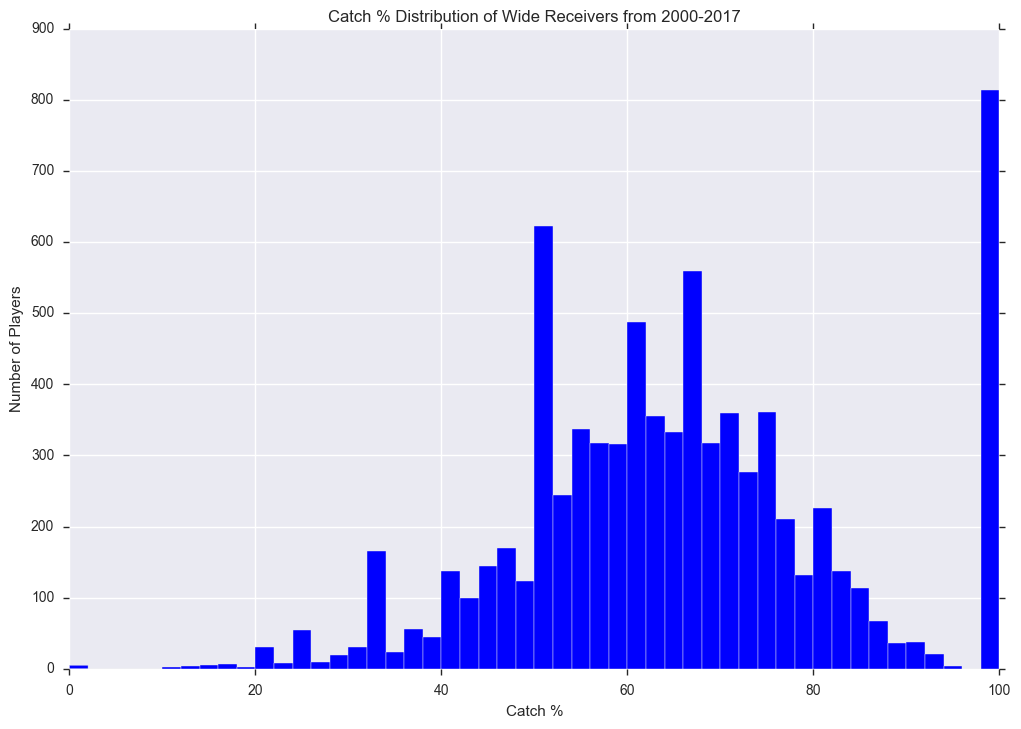

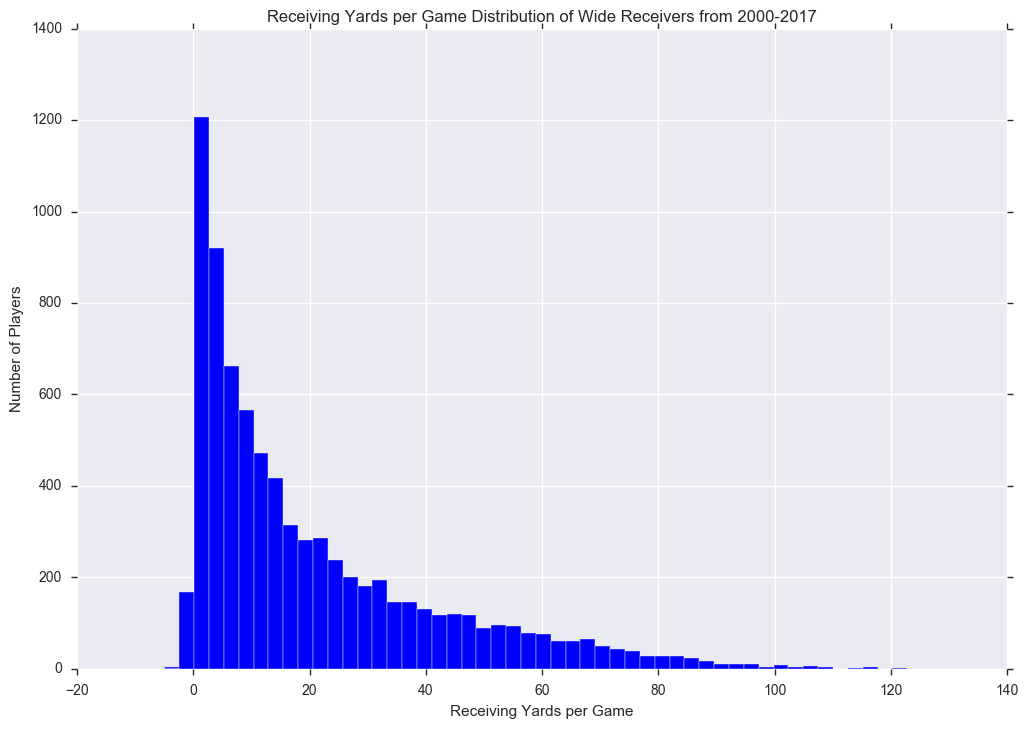

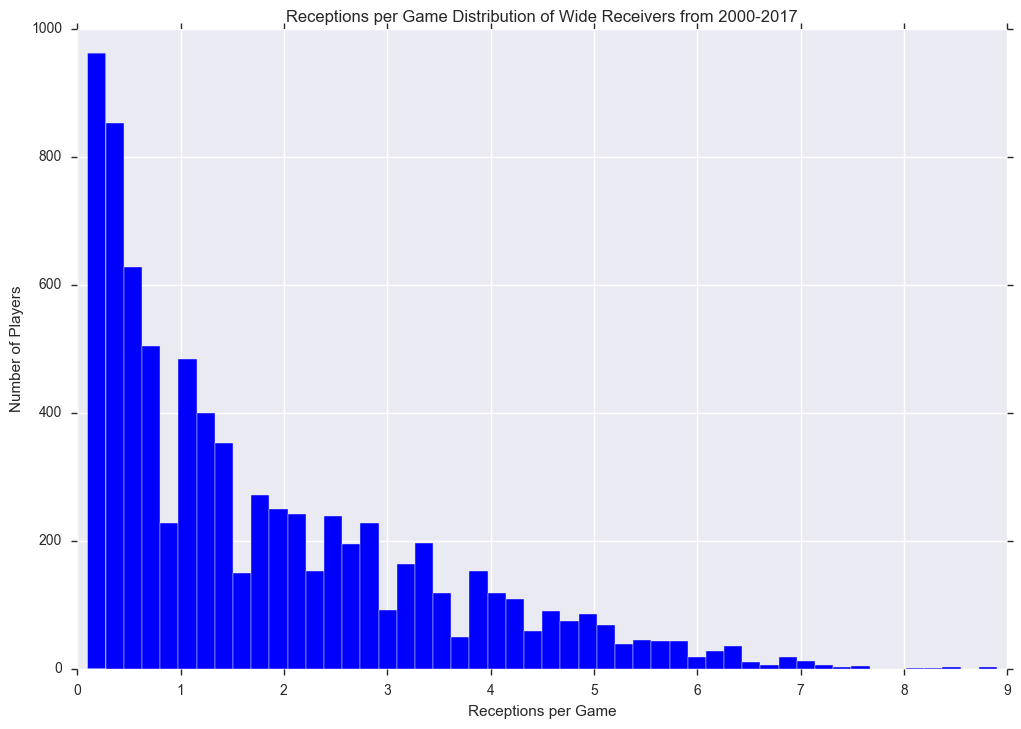

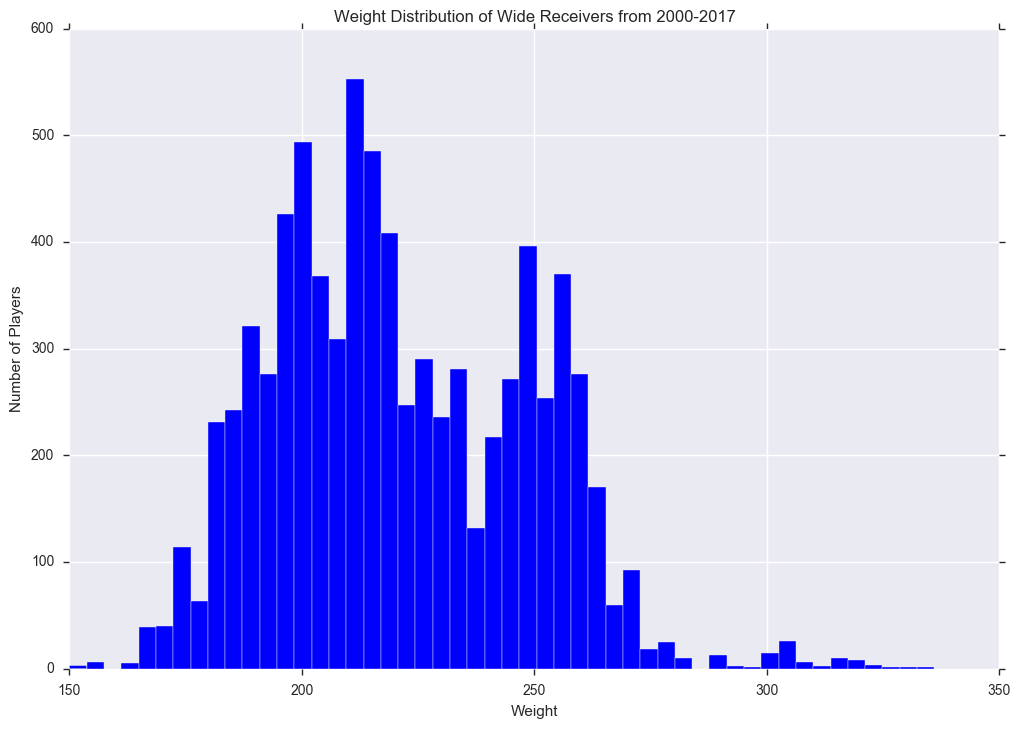

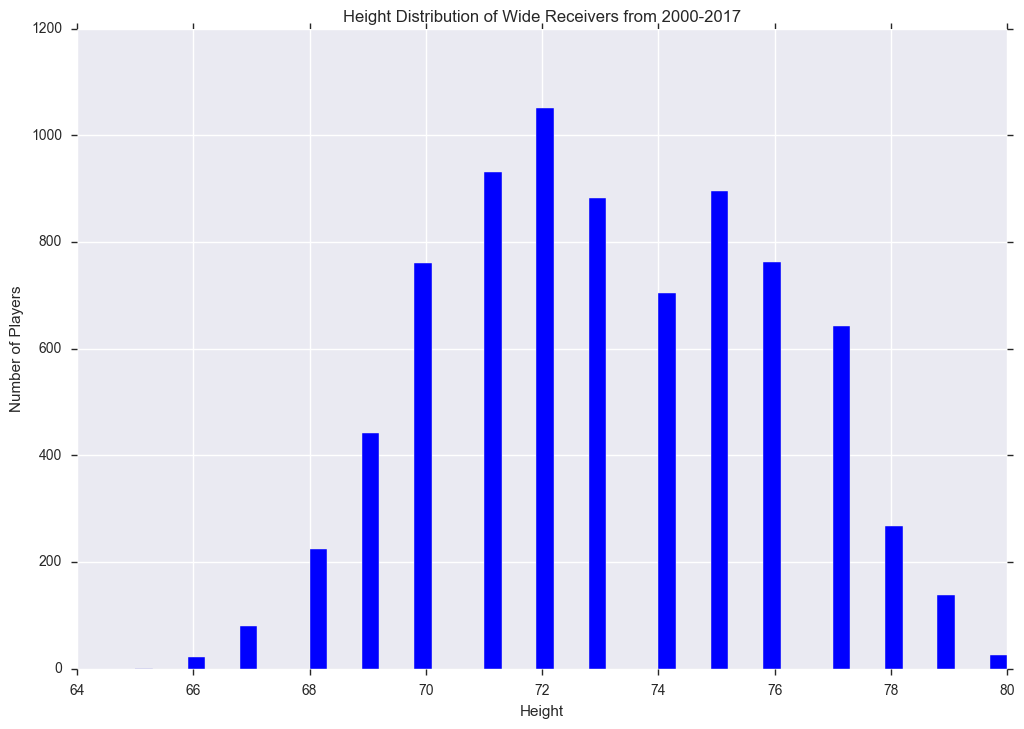

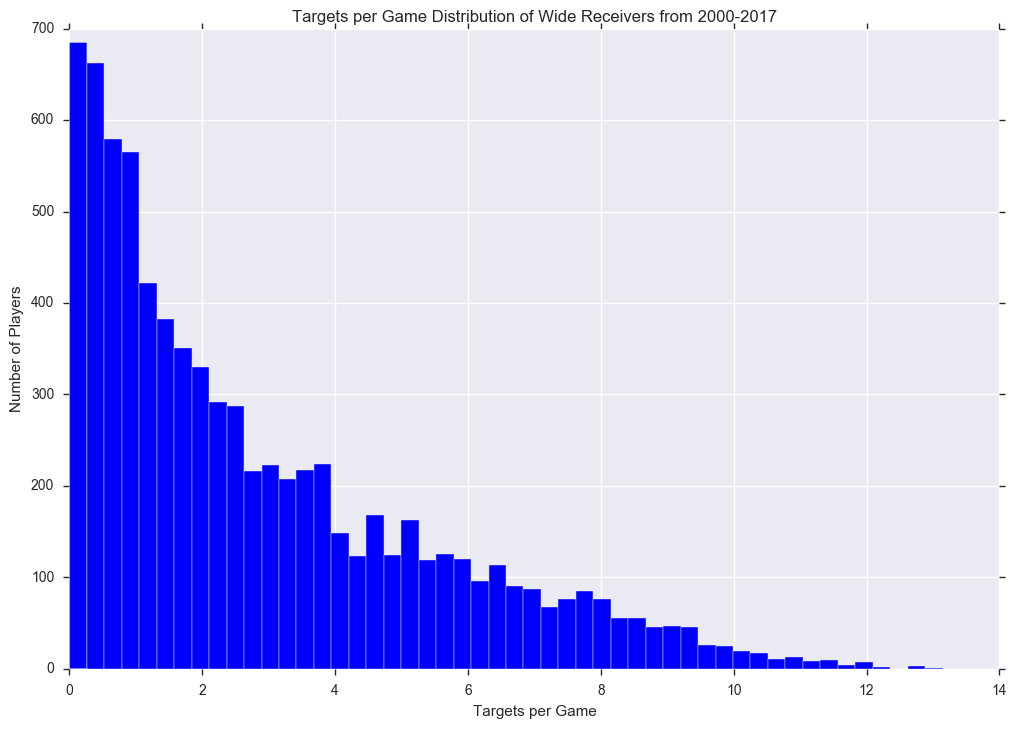

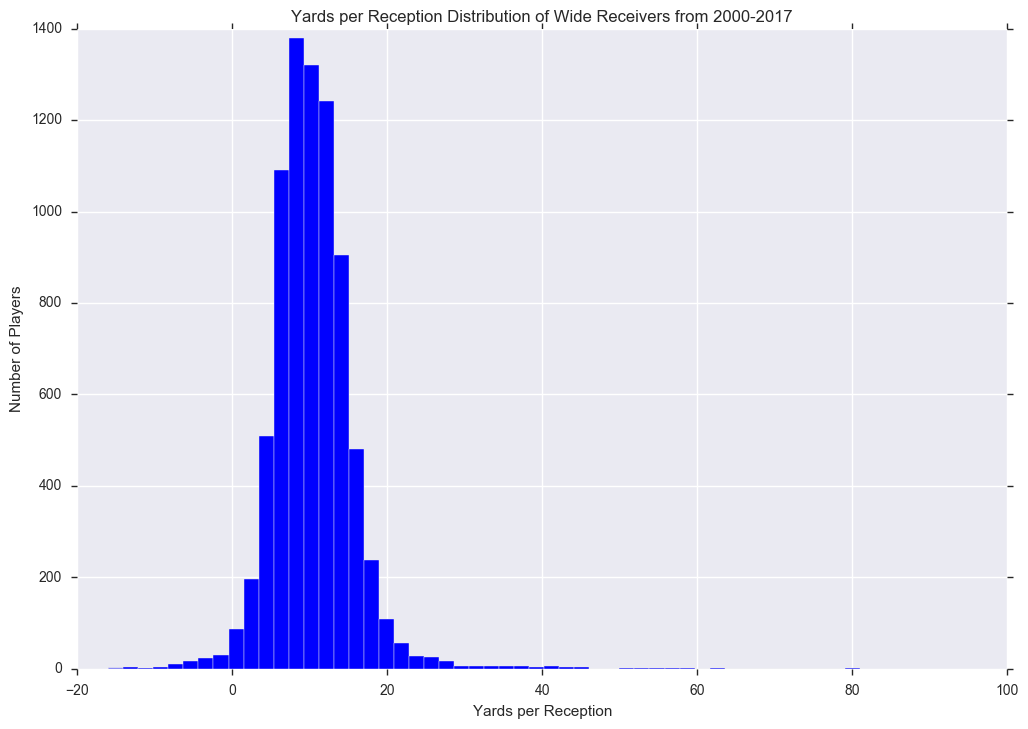

In [17]:
for k, v in cols.items():
    make_histogram(k, v)

### Bivariate

Target variable is *rec_per_yards*

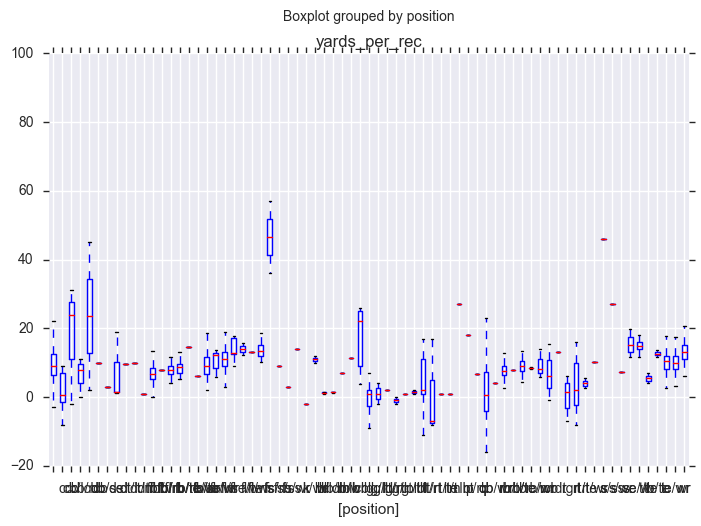

In [18]:
df[['yards_per_rec', 'position']].boxplot(by='position');

In [19]:
df['position'].value_counts()

wr             2258
               1972
te             1273
rb             1152
fb              520
fb/te           115
te/wr           106
qb               88
fb/rb            85
fb/wr            38
rb/wr            30
rb/te            24
lg               13
lt               12
c                12
fl/wr            10
se/wr             9
fb/te/wr          9
rt                6
fb/rb/te          6
rg                6
fl                5
lcb               5
se                4
lt/rt             3
de                3
tb/te             3
rcb               3
cb                3
cb/lcb            3
               ... 
t/te              2
fl/se/wr          2
nt                1
rb/tb             1
fs/rb             1
db                1
db/ss             1
dt                1
fs/ss             1
s/ss              1
s                 1
lt/rt/te          1
rdt               1
lb/wr             1
lg/lt/rt          1
dt/ldt            1
dt/nt             1
lb/mlb            1
s/wr              1


Too much variation in positions. Need to map or consolidate in order to make this a usable feature.

In [20]:
positions = ['wr', 'te', 'rb', 'fb']
filtered_positions = df.loc[df['position'].isin(positions)]

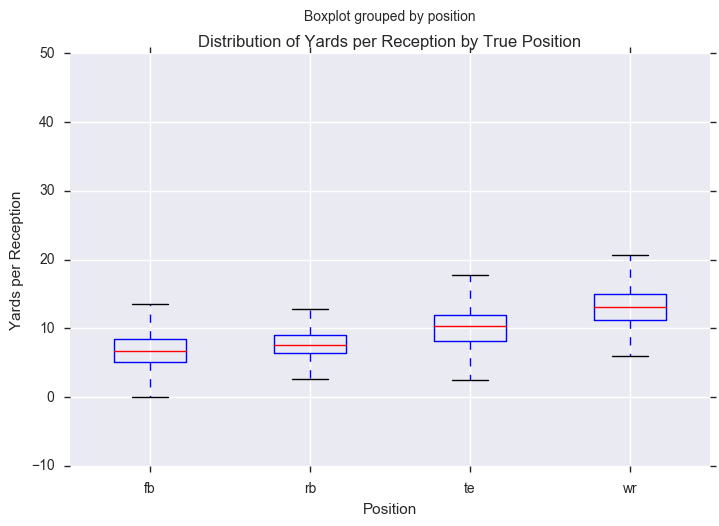

In [21]:
filtered_positions[['yards_per_rec', 'position']].boxplot(by='position')
plt.xlabel('Position')
plt.ylabel('Yards per Reception')
plt.title('Distribution of Yards per Reception by True Position');

In [22]:
df.columns

Index(['index', 'age', 'catch_pct', 'demo_link', 'fumble', 'games',
       'games_start', 'height', 'longest_rec', 'name', 'position',
       'rec_per_game', 'rec_yards', 'rec_yards_per_game', 'receptions',
       'targets', 'td', 'team', 'weight', 'yards_per_rec', 'targets_per_game'],
      dtype='object')

In [23]:
def make_scatter(x, y):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.scatter(df[x], df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(x + y);

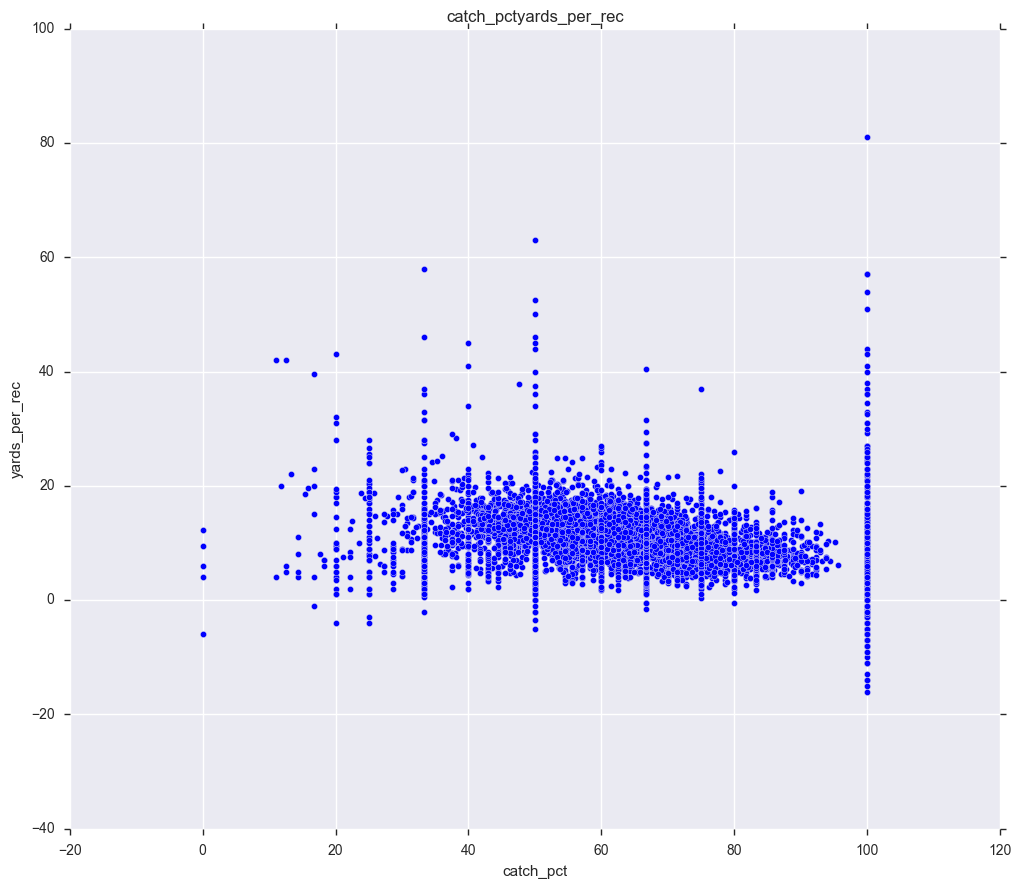

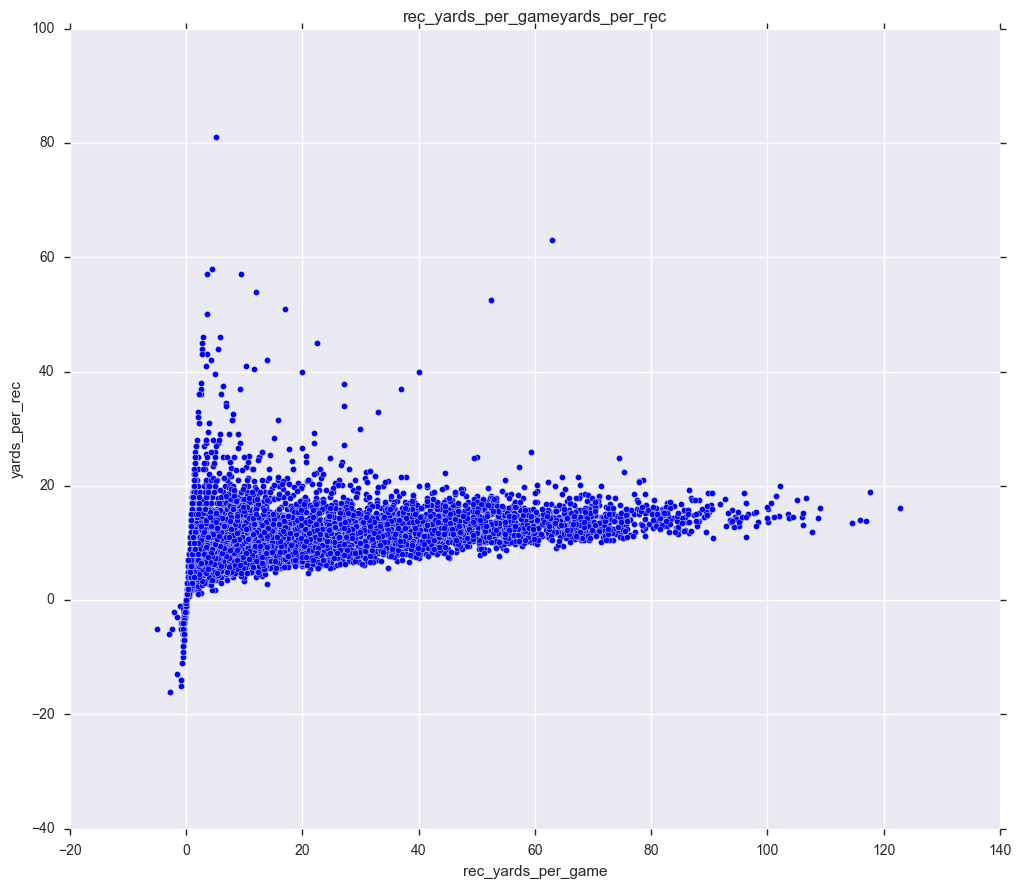

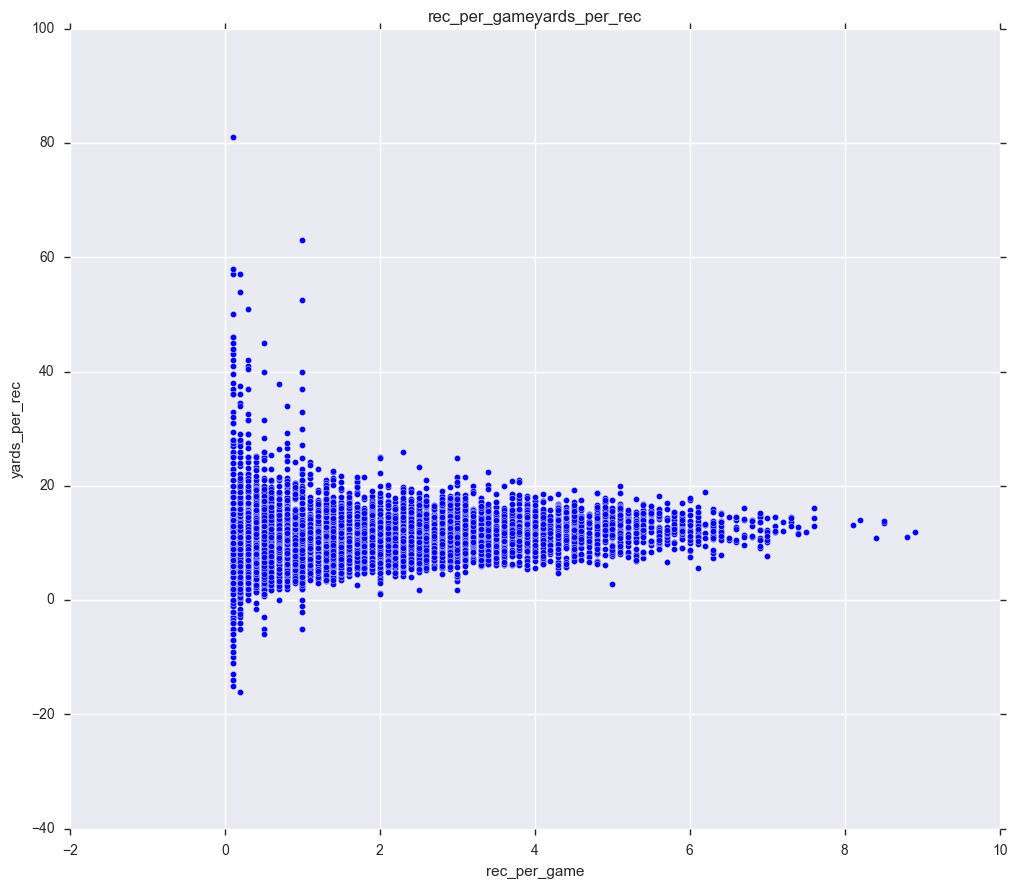

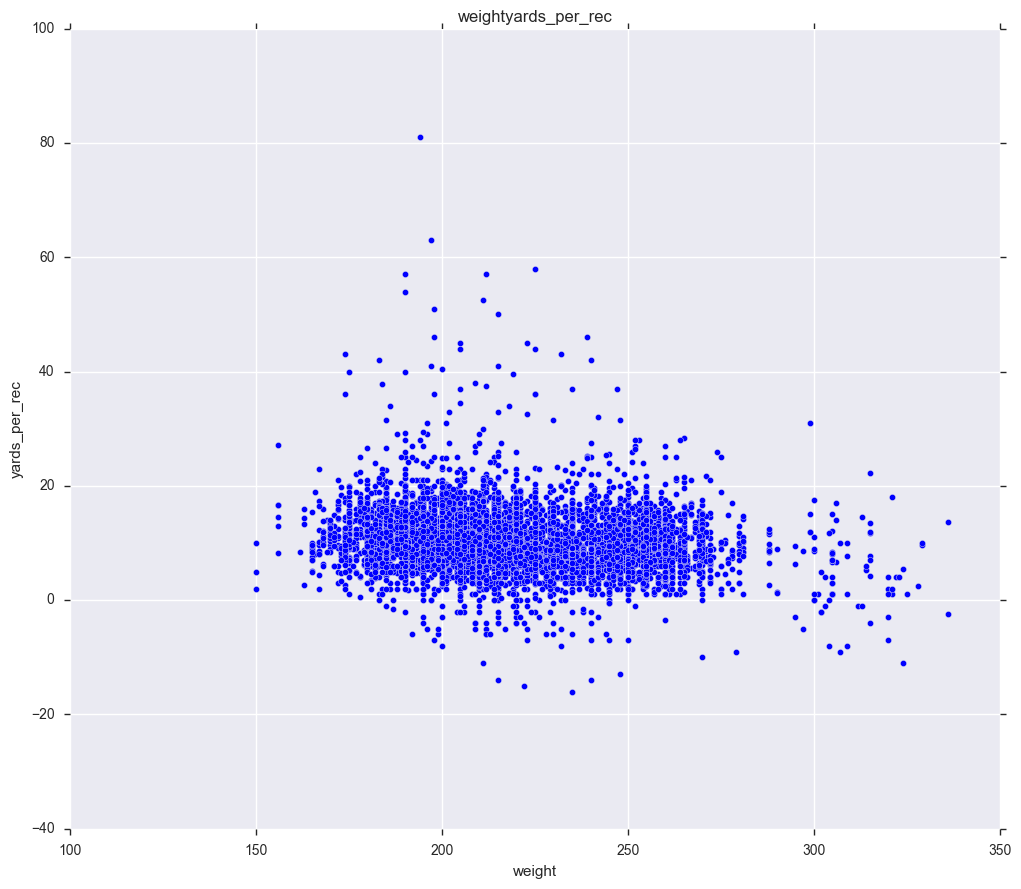

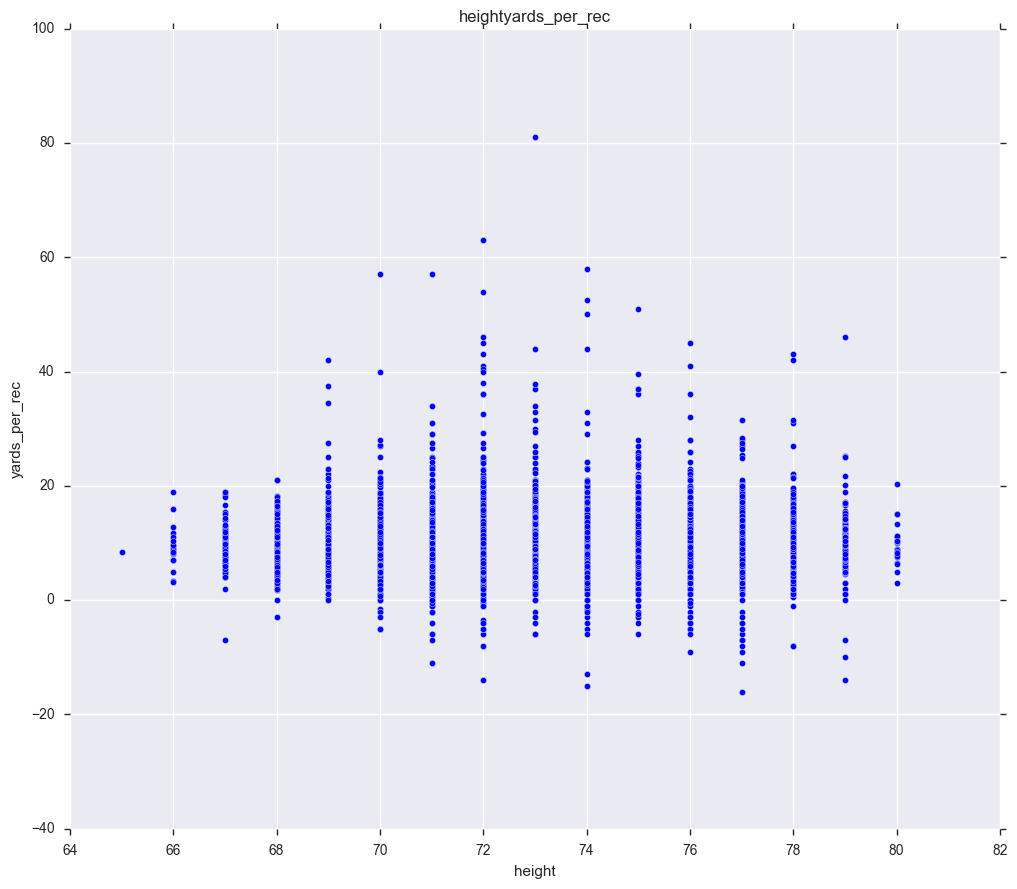

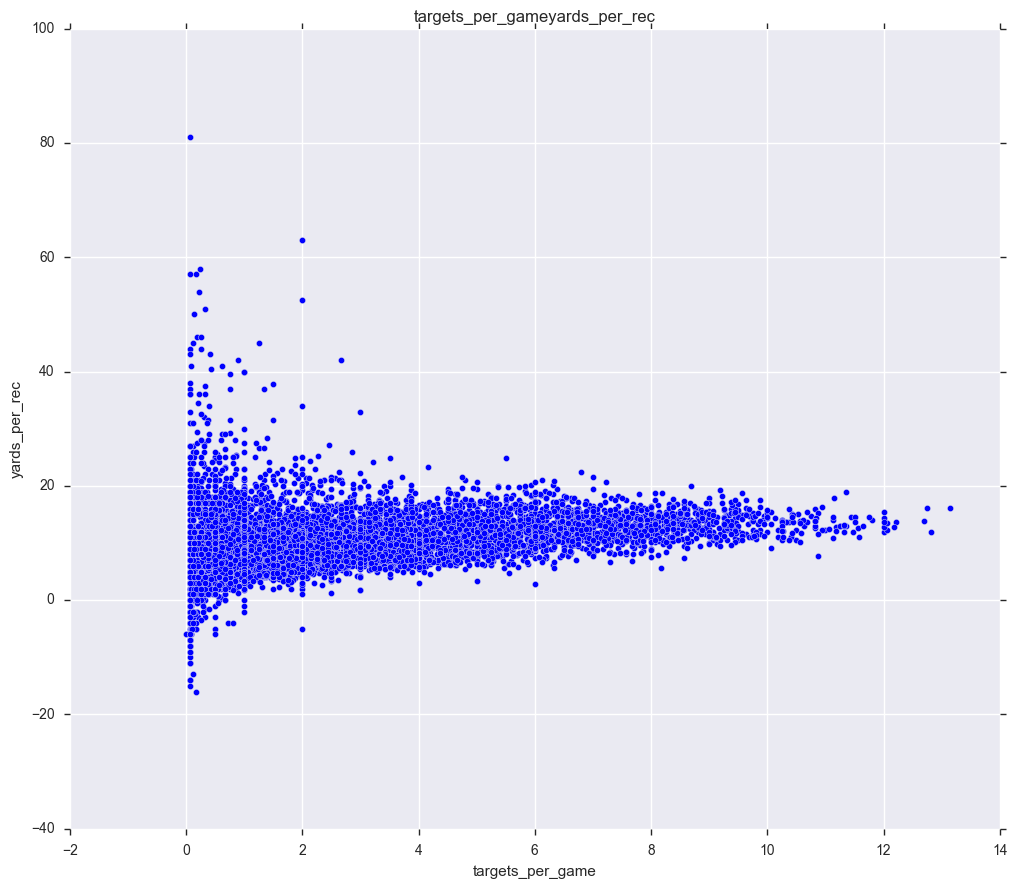

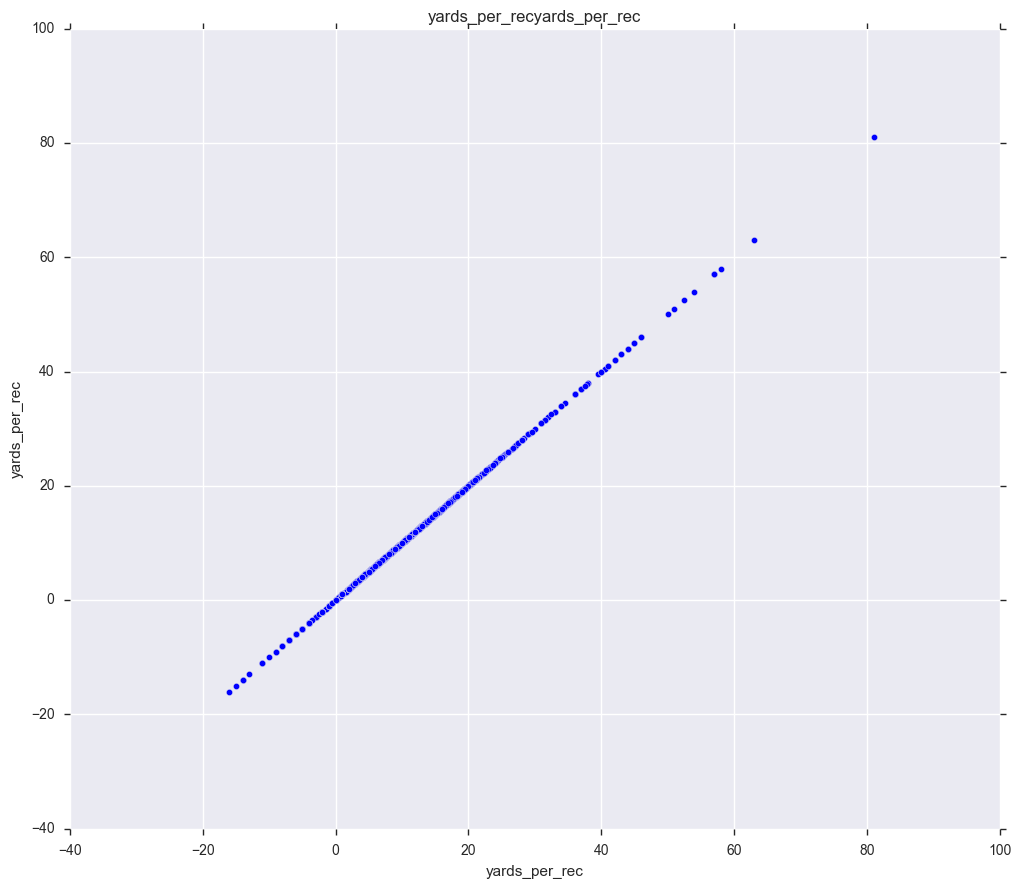

In [24]:
for feature in col_list:
    make_scatter(feature, 'yards_per_rec')

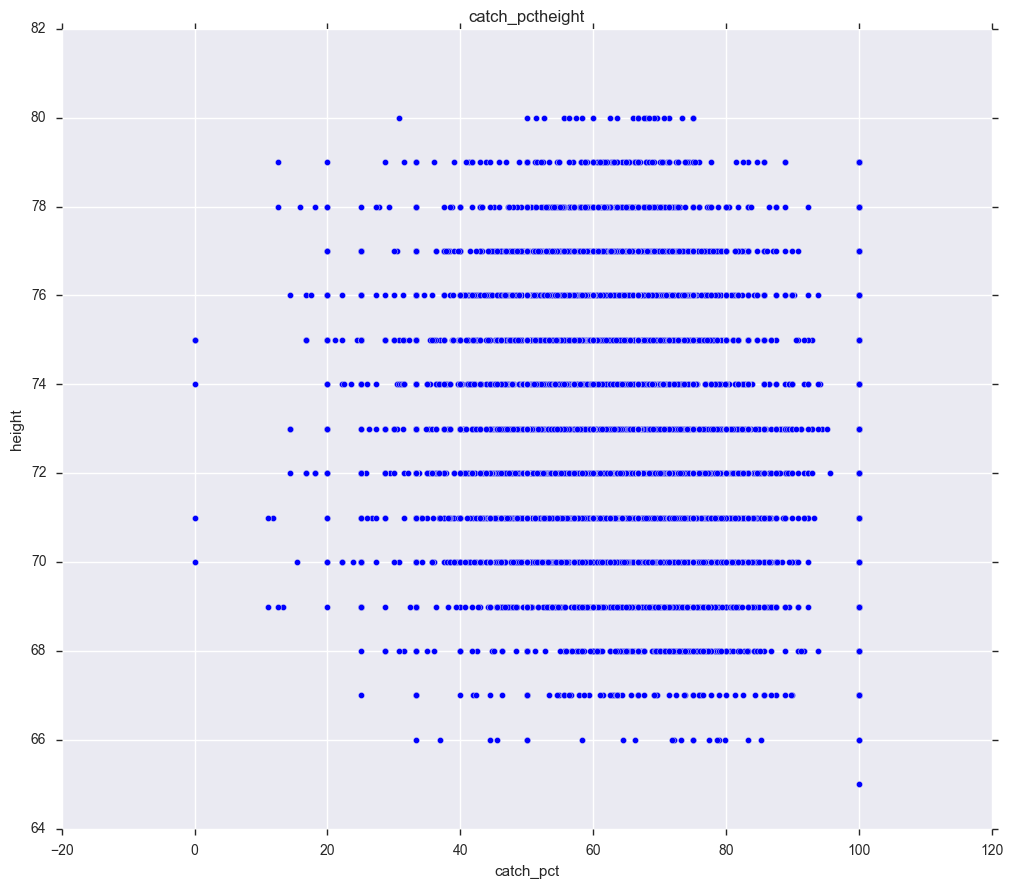

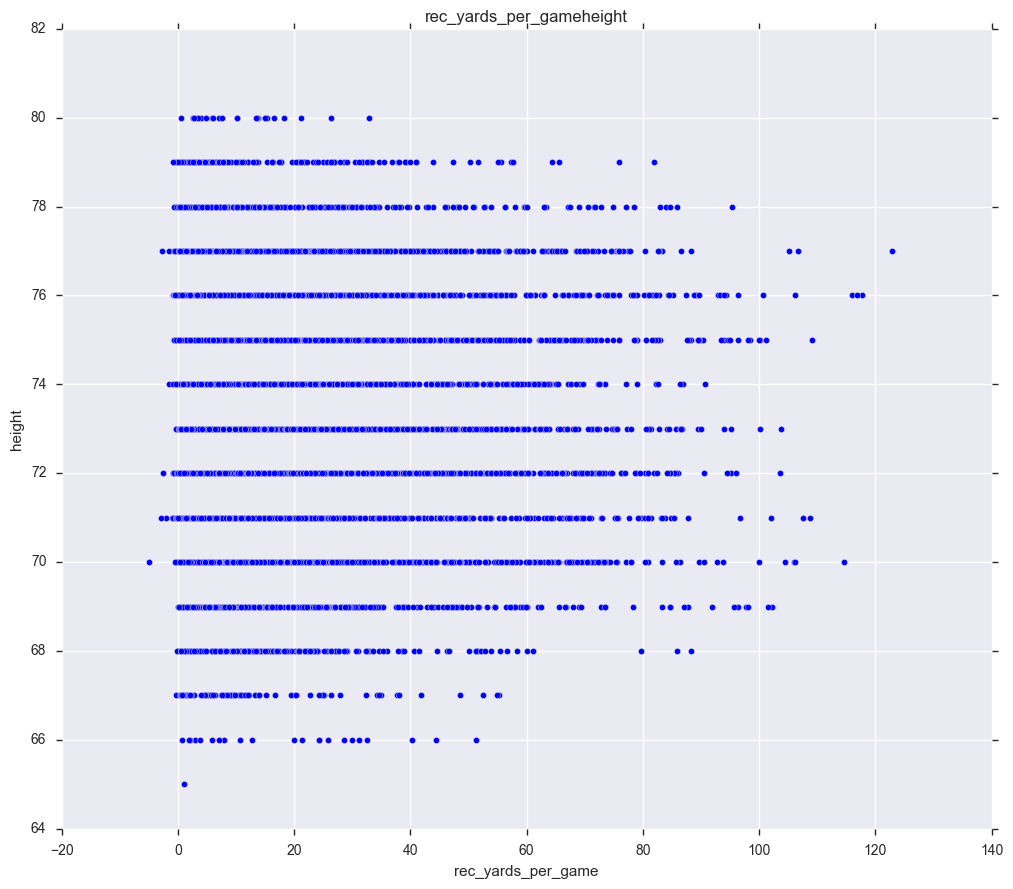

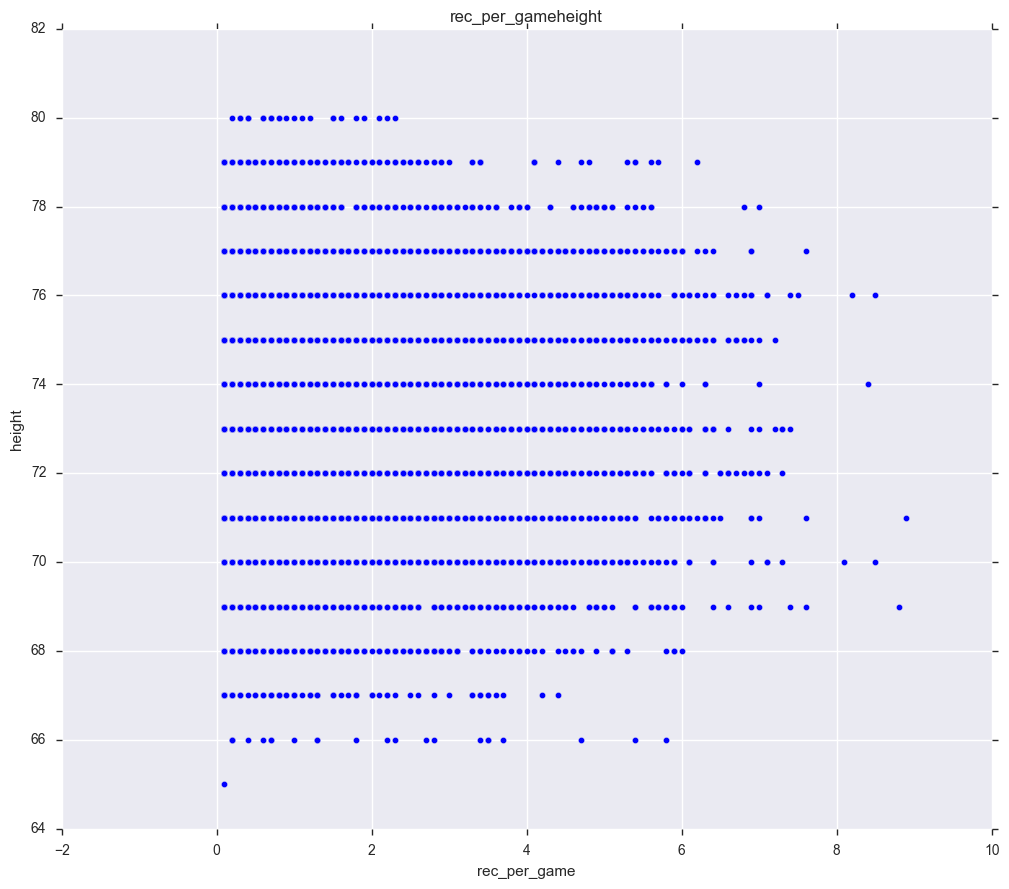

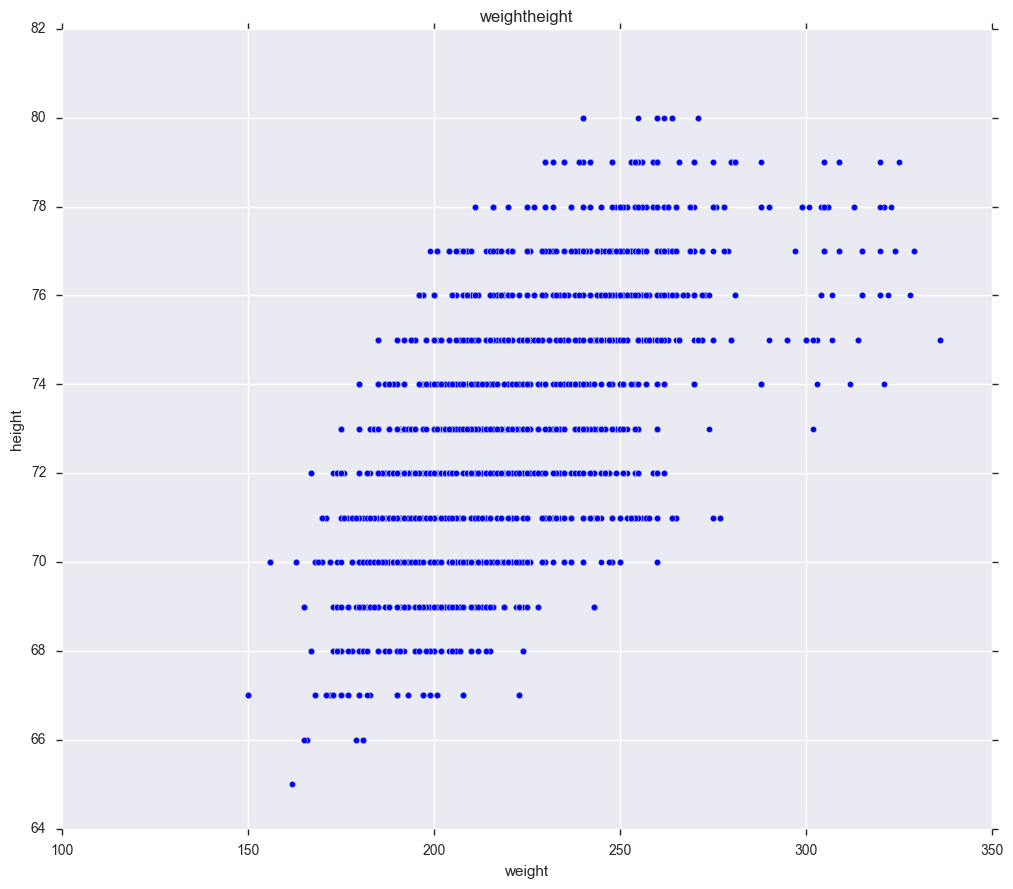

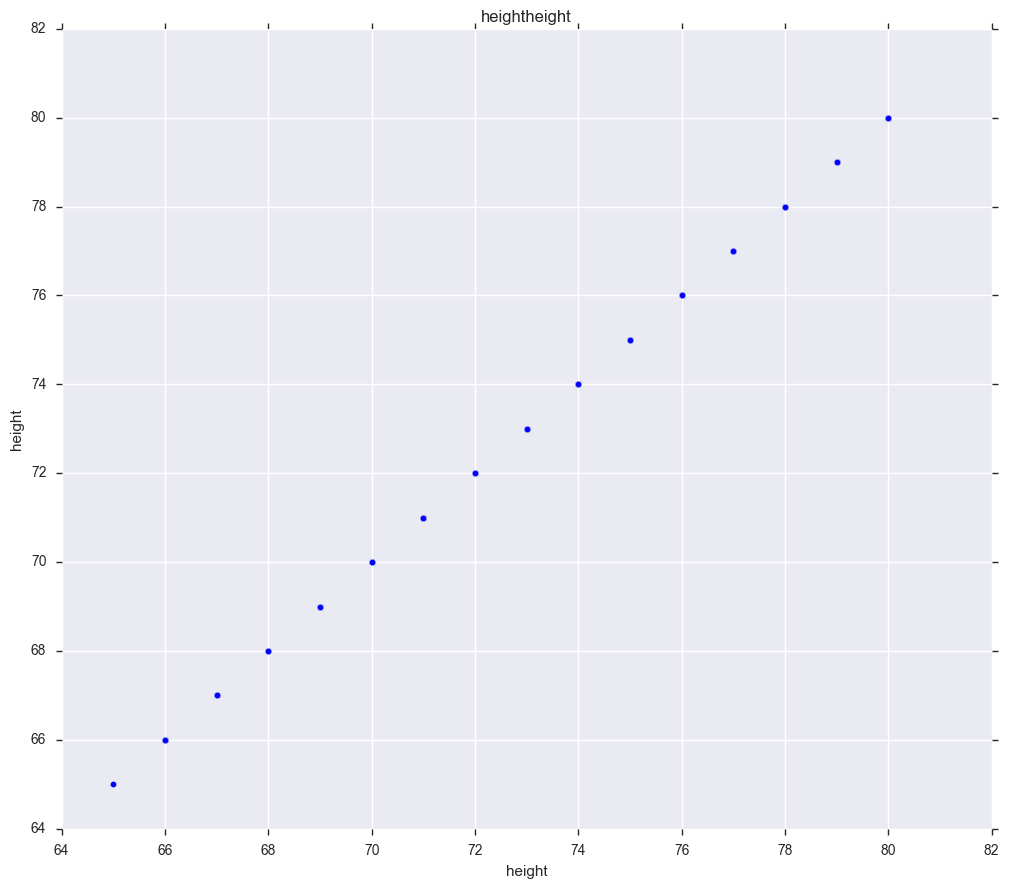

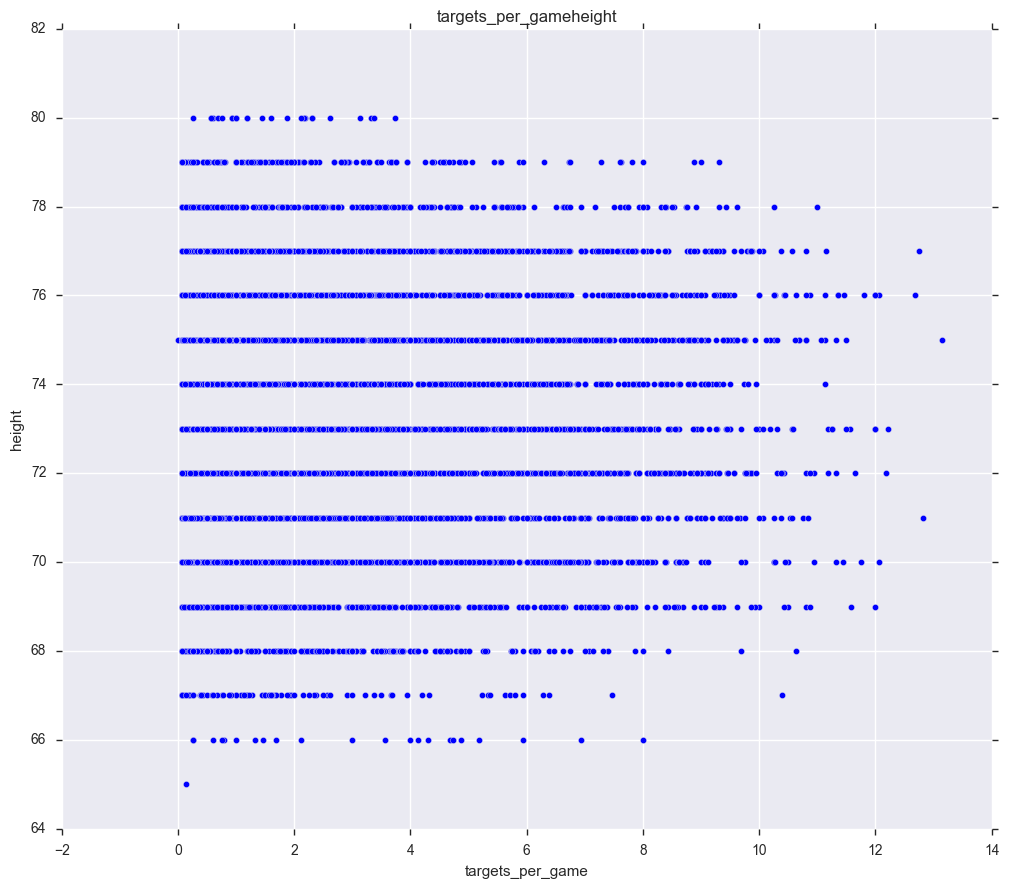

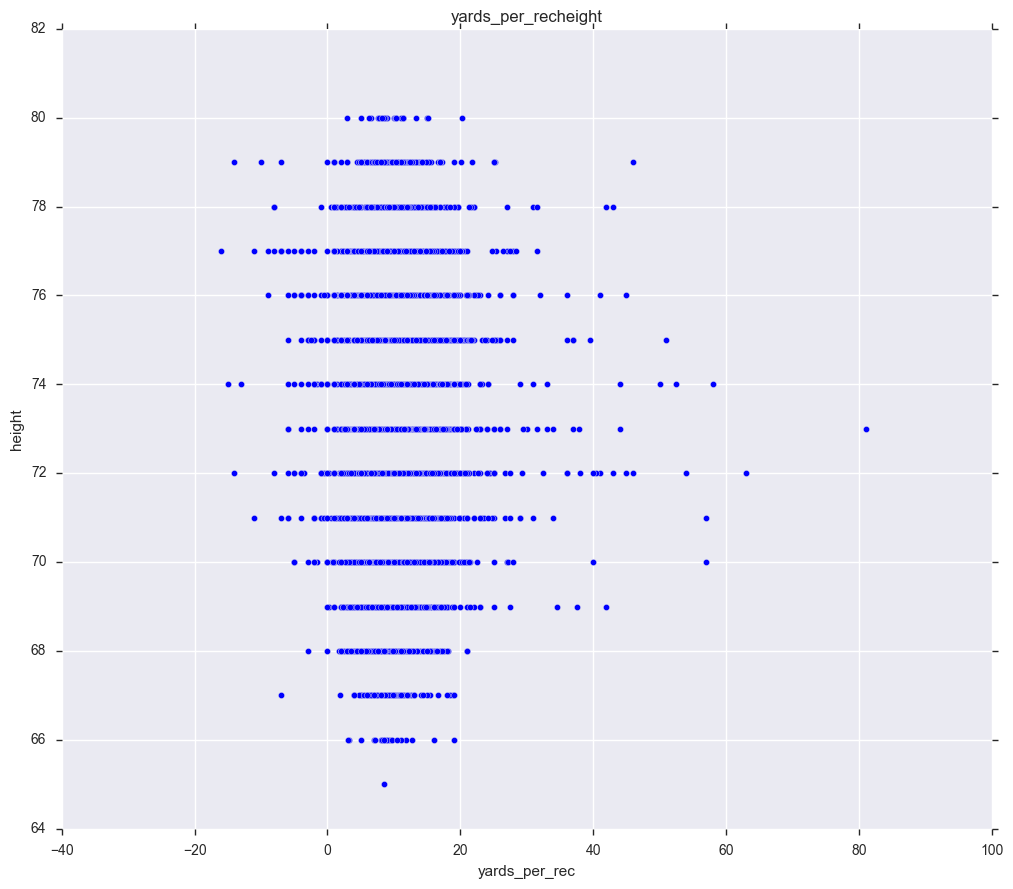

In [25]:
for feature in col_list:
    make_scatter(feature, 'height')

### Multivariate

In [26]:
corr = df.corr()
print(corr)

                       index       age  catch_pct    fumble     games  \
index               1.000000 -0.088917   0.062730 -0.081307 -0.196099   
age                -0.088917  1.000000   0.009051 -0.019754  0.106893   
catch_pct           0.062730  0.009051   1.000000  0.157588 -0.057361   
fumble             -0.081307 -0.019754   0.157588  1.000000  0.215452   
games              -0.196099  0.106893  -0.057361  0.215452  1.000000   
games_start        -0.119857  0.210397  -0.026707  0.272474  0.491553   
height             -0.002089  0.013543  -0.068846 -0.128248  0.038119   
longest_rec        -0.015380  0.025664  -0.220727  0.076620  0.304634   
rec_per_game       -0.007113  0.121664  -0.064004  0.145653  0.178351   
rec_yards          -0.064358  0.113838  -0.148047  0.122557  0.388270   
rec_yards_per_game -0.008186  0.105116  -0.148511  0.081709  0.182211   
receptions         -0.072554  0.132304  -0.080765  0.189832  0.430493   
targets            -0.088354  0.129072  -0.194825  

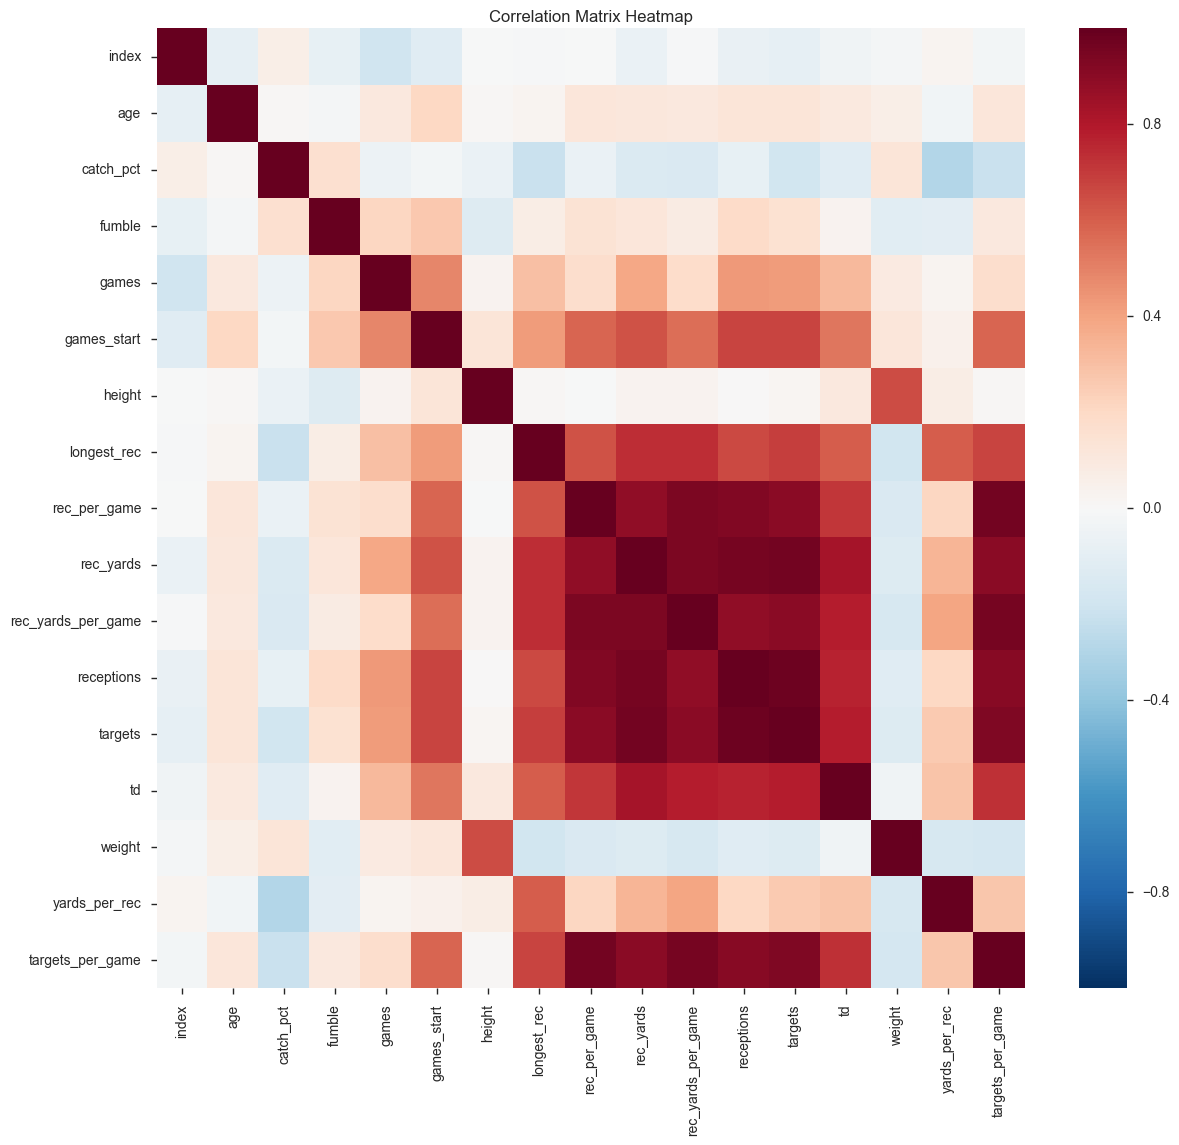

In [27]:
fig, ax = plt.subplots(figsize=(14,12));
sns.heatmap(corr, ax=ax);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation Matrix Heatmap');

## Inferential Analysis

Are taller players better?

In [28]:
df['height'].describe()

count    7830.000000
mean       73.124521
std         2.826430
min        65.000000
25%        71.000000
50%        73.000000
75%        75.000000
max        80.000000
Name: height, dtype: float64

In [29]:
more_targets = df.loc[df['targets'] >= 3]
more_targets.describe()

,index,age,catch_pct,fumble,games,games_start,height,longest_rec,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,weight,yards_per_rec,targets_per_game
count,7039.000000,7023.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000
mean,3880.373491,26.388865,62.726339,0.837335,12.739878,6.258133,73.104276,32.672255,1.956798,296.196761,22.291789,25.724677,41.666714,1.778236,220.107544,10.624563,3.167818
std,2256.075792,3.163201,15.162263,1.296088,3.924637,5.610751,2.819407,19.581763,1.584303,321.323481,21.386434,23.980190,38.994229,2.520640,26.502987,4.331838,2.562438
min,0.000000,21.000000,11.100000,0.000000,1.000000,0.000000,66.000000,-4.000000,0.100000,-7.000000,-0.800000,1.000000,3.000000,0.000000,150.000000,-4.000000,0.187500
25%,1912.500000,24.000000,53.400000,0.000000,10.000000,1.000000,71.000000,17.000000,0.700000,61.000000,5.700000,7.000000,11.000000,0.000000,200.000000,7.600000,1.071429
50%,3886.000000,26.000000,63.200000,0.000000,14.000000,5.000000,73.000000,28.000000,1.500000,170.000000,14.500000,18.000000,28.000000,1.000000,215.000000,10.300000,2.384615
75%,5829.500000,28.000000,72.300000,1.000000,16.000000,11.000000,75.000000,45.000000,2.900000,424.000000,32.500000,38.000000,61.000000,2.000000,243.000000,13.100000,4.687500
max,7830.000000,42.000000,100.000000,11.000000,17.000000,16.000000,80.000000,99.000000,8.900000,1964.000000,122.800000,143.000000,205.000000,23.000000,336.000000,58.000000,13.142857


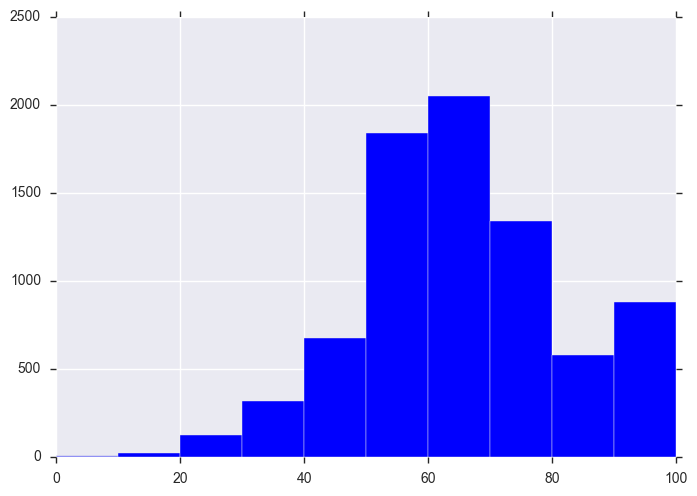

In [30]:
df['catch_pct'].hist();

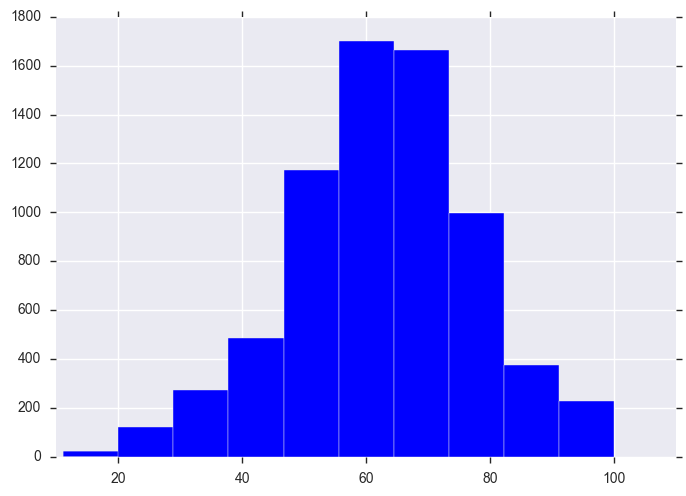

In [31]:
more_targets['catch_pct'].hist();

In [32]:
more_targets['tall'] = more_targets['height'].apply(lambda x: 1 if x >= 75.0 else 0)

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
more_targets.head()

,index,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,...,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec,targets_per_game,tall
0,0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,...,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9,10.562500,1
1,1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,...,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6,9.750000,0
2,2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,...,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0,9.312500,0
3,3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,...,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0,10.812500,1
4,4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,...,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0,10.428571,0


In [34]:
N = len(more_targets)
len(more_targets[more_targets.tall == 1]) / N

0.3462139508452905

In [35]:
from pandas import Series

more_targets.groupby('tall').yards_per_rec.quantile([0.25, 0.5, 0.9]).unstack()

,0.25,0.5,0.9
tall,,,
0,7.2,10.0,15.5
1,8.4,11.0,15.9


In [36]:
more_targets.groupby('tall').yards_per_rec.var()

tall
0    19.371432
1    17.201060
Name: yards_per_rec, dtype: float64

In [37]:
more_targets.groupby('tall').yards_per_rec.mean()

tall
0    10.345241
1    11.152031
Name: yards_per_rec, dtype: float64

In [38]:
# Bayes Theorem
# Calculate probability that they got yards more than 2 standard devaiations from the average

yards_mean = more_targets['yards_per_rec'].mean()
yards_stdev = more_targets['yards_per_rec'].std()
stdMean = yards_mean + 2 * yards_stdev

N = len(more_targets)
p_yards = len(more_targets[more_targets.yards_per_rec > stdMean]) / N
p_tall = more_targets.tall.value_counts() / N

p_tall_yards = (more_targets[more_targets.yards_per_rec > stdMean].tall.value_counts() 
                  / len(more_targets[more_targets.yards_per_rec > stdMean]))

p_yards_tall = (p_tall_yards * p_yards) / p_tall

In [39]:
p_yards_tall

0    0.023903
1    0.030776
Name: tall, dtype: float64

Slightly higher probability, but the difference is neglibile between the two groups.

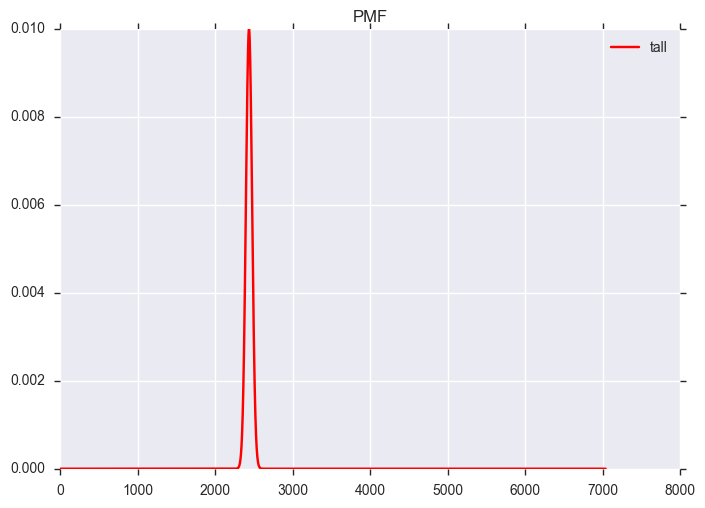

In [40]:
# Graph PMF / CDF

N = len(more_targets)
mean = more_targets[['tall']].mean()
y = []

for i in range(N):
    myBinom = stats.binom(n = N, p = mean)
    y.append(myBinom.pmf(i))

    
plt.plot(y, 'r', label = 'tall')
plt.legend()
plt.title('PMF')
plt.show()

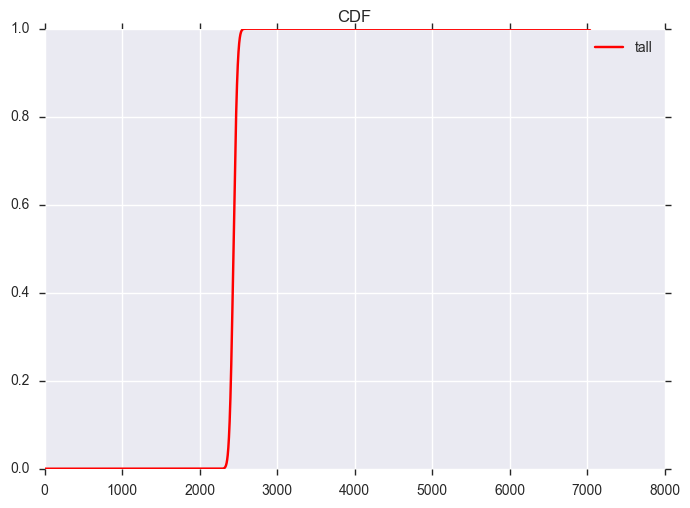

In [41]:
y = []

for i in range(N):
    myBinom = stats.binom(n = N, p = mean)
    y.append(myBinom.cdf(i))

plt.plot(y, 'r', label = 'tall')
plt.legend()
plt.title('CDF')
plt.show()

In [42]:
# Expected values
mean * N

tall    2437.0
dtype: float64

In [43]:
col_list

['catch_pct',
 'rec_yards_per_game',
 'rec_per_game',
 'weight',
 'height',
 'targets_per_game',
 'yards_per_rec']

In [44]:
# Hypothesis testing
import statsmodels.stats.api as sm

{'tall': sm.DescrStatsW(more_targets[more_targets.tall == 0].yards_per_rec).zconfint_mean(alpha = 0.05),
 'short': sm.DescrStatsW(more_targets[more_targets.tall == 1].yards_per_rec).zconfint_mean(alpha = 0.05)}

/Users/osx10/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


{'short': (10.987367461815827, 11.316694909952739),
 'tall': (10.218079696531914, 10.472402702425073)}

In [45]:
for col in col_list:
    tall_z = sm.DescrStatsW(more_targets[more_targets.tall == 1][col]).zconfint_mean(alpha = 0.05)
    short_z = sm.DescrStatsW(more_targets[more_targets.tall == 0][col]).zconfint_mean(alpha = 0.05)
    print(col)
    print("tall", tall_z)
    print("short", short_z)
    print('------')

catch_pct
tall (60.521224906533519, 61.652102955592056)
short (63.145092933498155, 64.044172603225036)
------
rec_yards_per_game
tall (22.828733382242586, 24.617635103600687)
short (20.935191794985997, 22.132387518355991)
------
rec_per_game
tall (1.9197947897530243, 2.0507427564102922)
short (1.8969716164892949, 1.9864703652577664)
------
weight
tall (240.99681332659233, 242.73974801932476)
short (207.98099980567738, 209.18718793878153)
------
height
tall (76.23835364111288, 76.334481812313456)
short (71.367645419776906, 71.470685740588166)
------
targets_per_game
tall (3.1563471124440556, 3.3683716284421039)
short (3.0454551376442325, 3.1900512464682569)
------
yards_per_rec
tall (10.987367461815827, 11.316694909952739)
short (10.218079696531914, 10.472402702425073)
------


In [46]:
# perform two-sided t-test for the two samples (tall, targets_per_game)
stats.ttest_ind(more_targets[more_targets.tall == 0].targets_per_game,  
          more_targets[more_targets.tall == 1].targets_per_game, 
          equal_var = False)  

Ttest_indResult(statistic=-2.2087474458092702, pvalue=0.02724037533367045)

In [47]:
for col in col_list:
    two_sided_t = stats.ttest_ind(more_targets[more_targets.tall == 0][col],  
          more_targets[more_targets.tall == 1][col], 
          equal_var = False)  
    
    print(col)
    print(two_sided_t)
    print('------')

catch_pct
Ttest_indResult(statistic=6.8047963017086612, pvalue=1.1225814241519213e-11)
------
rec_yards_per_game
Ttest_indResult(statistic=-3.9870348169442469, pvalue=6.7938199162148591e-05)
------
rec_per_game
Ttest_indResult(statistic=-1.0762453446662614, pvalue=0.28187278145861805)
------
weight
Ttest_indResult(statistic=-61.554780708610927, pvalue=0.0)
------
height
Ttest_indResult(statistic=-135.3925947290046, pvalue=0.0)
------
targets_per_game
Ttest_indResult(statistic=-2.2087474458092702, pvalue=0.02724037533367045)
------
yards_per_rec
Ttest_indResult(statistic=-7.6005311565216145, pvalue=3.4747167490089918e-14)
------


**Findings:**

- Taller players obviously differ in height and weight than shorter players
- Taller players have more receiving yards per game, yards per reception, targets per game
- Shorter players have a higher catch percentage
- There is not a statistically significant difference in the number of receptions per game

## Regression Analysis

Goal is to predict number of touchdowns in a season.

In [126]:
nfl_df = more_targets.copy()
nfl_df.head()

,index,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,...,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec,targets_per_game,tall
0,0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,...,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9,10.562500,1
1,1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,...,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6,9.750000,0
2,2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,...,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0,9.312500,0
3,3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,...,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0,10.812500,1
4,4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,...,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0,10.428571,0


In [127]:
nfl_df = nfl_df.drop(['index', 'demo_link', 'name', 'team', 'position'], axis=1)

In [128]:
print(nfl_df.head())
print()
print(nfl_df.shape)

    age  catch_pct  fumble  games  games_start  height  longest_rec  \
0  28.0       60.4     2.0   16.0         16.0    77.0         78.0   
1  27.0       65.4     1.0   16.0         16.0    70.0         36.0   
2  32.0       67.8     0.0   16.0         16.0    74.0         61.0   
3  30.0       57.8     1.0   16.0         16.0    75.0         49.0   
4  27.0       66.4     3.0   14.0         13.0    72.0         69.0   

   rec_per_game  rec_yards  rec_yards_per_game  receptions  targets    td  \
0           6.4     1413.0                88.3       102.0    169.0  14.0   
1           6.4     1183.0                73.9       102.0    156.0   6.0   
2           6.3     1317.0                82.3       101.0    149.0   9.0   
3           6.3     1602.0               100.1       100.0    173.0   8.0   
4           6.9     1451.0               103.6        97.0    146.0  13.0   

   weight  yards_per_rec  targets_per_game  tall  
0   247.0           13.9         10.562500     1  
1   247.

In [111]:
import warnings

# this is for if you're using pandas 0.20+
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

In [112]:
# Simple regression
lm = sm.OLS.from_formula('td ~ targets_per_game', nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     7478.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:52:29   Log-Likelihood:                -13947.
No. Observations:                7039   AIC:                         2.790e+04
Df Residuals:                    7037   BIC:                         2.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4584      0.033  

In [113]:
result.rsquared, result.fvalue, result.params.Intercept, result.params.targets_per_game

(0.51519507447772295,
 7478.1165541874152,
 -0.45844324517091073,
 0.70606293761700523)

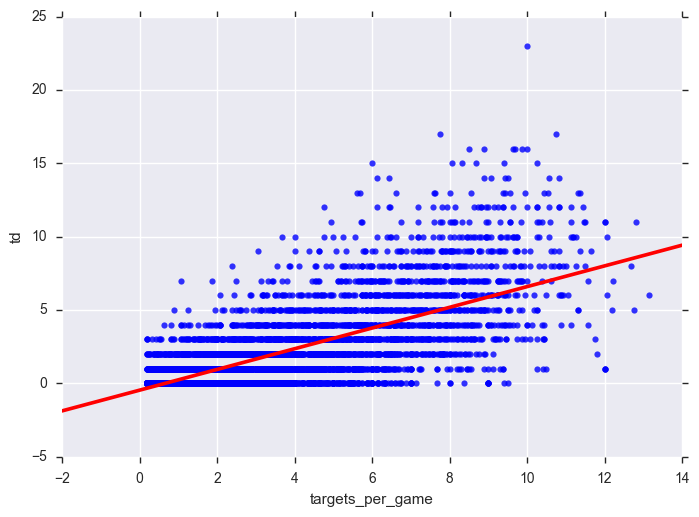

In [114]:
sns.regplot('targets_per_game', 'td', nfl_df, line_kws = {"color":"r"}, ci=None);

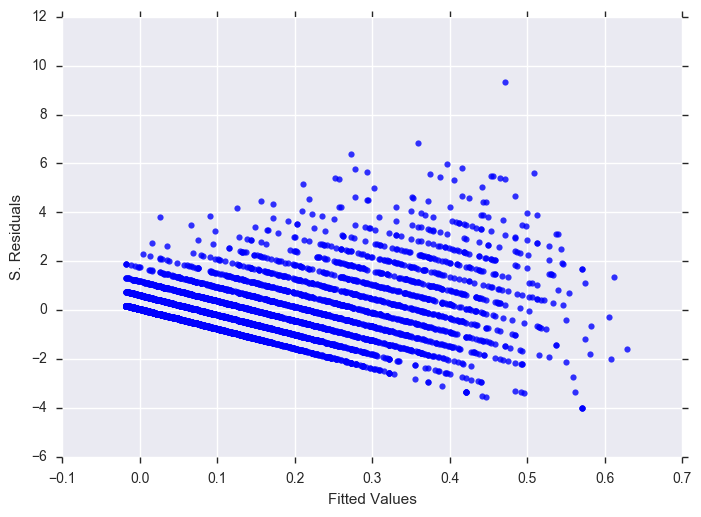

In [115]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False);

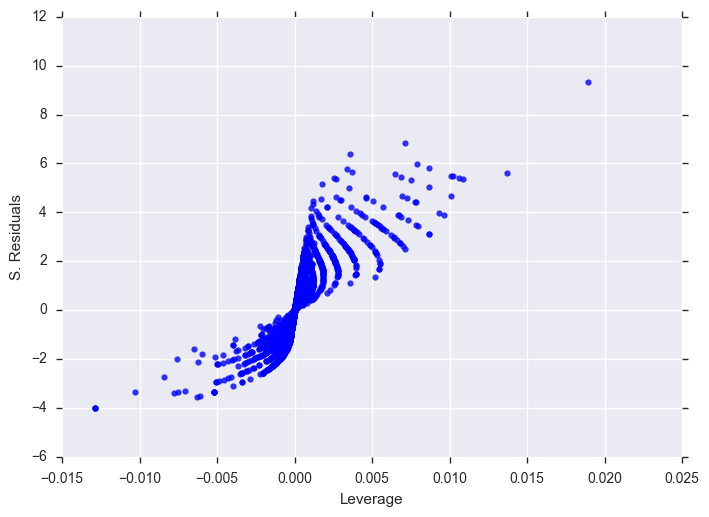

In [116]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False);

In [117]:
nfl_df.columns

Index(['age', 'catch_pct', 'fumble', 'games', 'games_start', 'height',
       'longest_rec', 'rec_per_game', 'rec_yards', 'rec_yards_per_game',
       'receptions', 'targets', 'td', 'weight', 'yards_per_rec',
       'targets_per_game', 'tall', 'fumble_per_game'],
      dtype='object')

In [118]:
lm = sm.OLS.from_formula('td ~ targets_per_game + rec_yards_per_game', nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     5312.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:52:31   Log-Likelihood:                -13256.
No. Observations:                7039   AIC:                         2.652e+04
Df Residuals:                    7036   BIC:                         2.654e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1291      0

In [119]:
# All columns (except response)
lm = sm.OLS.from_formula('td ~ ' + '+'.join(nfl_df.columns.difference(['td'])), nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     952.9
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:52:31   Log-Likelihood:                -12257.
No. Observations:                7023   AIC:                         2.455e+04
Df Residuals:                    7005   BIC:                         2.467e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2501      0

Several of the variables have high p-values. Let's remove them and see if we can keep a high R-squared value.

In [129]:
# All columns (except response)
lm = sm.OLS.from_formula('td ~ ' + '+'.join(nfl_df.columns.difference(
            ['td', 'catch_pct', 'age', 'targets_per_game', 'rec_yards_per_game',
             'rec_per_game', 'height'])), nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1624.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:54:53   Log-Likelihood:                -12282.
No. Observations:                7039   AIC:                         2.459e+04
Df Residuals:                    7028   BIC:                         2.466e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3428      0.195     -1.757

In [130]:
# Interaction terms
print(sm.OLS.from_formula('td ~ targets*rec_yards', nfl_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     5119.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:57:16   Log-Likelihood:                -12420.
No. Observations:                7039   AIC:                         2.485e+04
Df Residuals:                    7035   BIC:                         2.488e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0597      0.03

In [133]:
import numpy as np

In [134]:
# Non-linear transformations
print(sm.OLS.from_formula('td ~ targets + np.square(rec_yards)', nfl_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     6806.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:58:29   Log-Likelihood:                -12706.
No. Observations:                7039   AIC:                         2.542e+04
Df Residuals:                    7036   BIC:                         2.544e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1865 

Neither additions were that useful to the model.

In [ ]:
# Todo - Qualitative Predictors - Position and Team

In [135]:
# Best Subest Selection
import itertools
import time

In [139]:
y = nfl_df.td
X = nfl_df.drop(['td', 'catch_pct', 'age', 'targets_per_game', 'rec_yards_per_game',
             'rec_per_game', 'height'], axis=1)

In [182]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [183]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [184]:
models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1, 11):
    models.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.03059983253479004 seconds.
Processed  45 models on 2 predictors in 0.18716788291931152 seconds.
Processed  120 models on 3 predictors in 0.5582880973815918 seconds.
Processed  210 models on 4 predictors in 0.9789879322052002 seconds.
Processed  252 models on 5 predictors in 1.6451730728149414 seconds.
Processed  210 models on 6 predictors in 1.29414701461792 seconds.
Processed  120 models on 7 predictors in 0.9097490310668945 seconds.
Processed  45 models on 8 predictors in 0.34386515617370605 seconds.
Processed  10 models on 9 predictors in 0.0870218276977539 seconds.
Processed  1 models on 10 predictors in 0.01105499267578125 seconds.
Total elapsed time: 6.083124160766602 seconds.


In [185]:
models

,RSS,model
1,14387.697190,<statsmodels.regression.linear_model.Regressio...
2,14016.812265,<statsmodels.regression.linear_model.Regressio...
3,13868.652808,<statsmodels.regression.linear_model.Regressio...
4,13667.336302,<statsmodels.regression.linear_model.Regressio...
5,13615.569871,<statsmodels.regression.linear_model.Regressio...
6,13573.863670,<statsmodels.regression.linear_model.Regressio...
7,13554.033189,<statsmodels.regression.linear_model.Regressio...
8,13525.576353,<statsmodels.regression.linear_model.Regressio...
9,13518.123285,<statsmodels.regression.linear_model.Regressio...
10,13514.066136,<statsmodels.regression.linear_model.Regressio...


In [186]:
print(models.loc[6, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     4611.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        10:13:05   Log-Likelihood:                -12299.
No. Observations:                7039   AIC:                         2.461e+04
Df Residuals:                    7033   BIC:                         2.465e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
fumble           -0.1290      0.013     -9.770

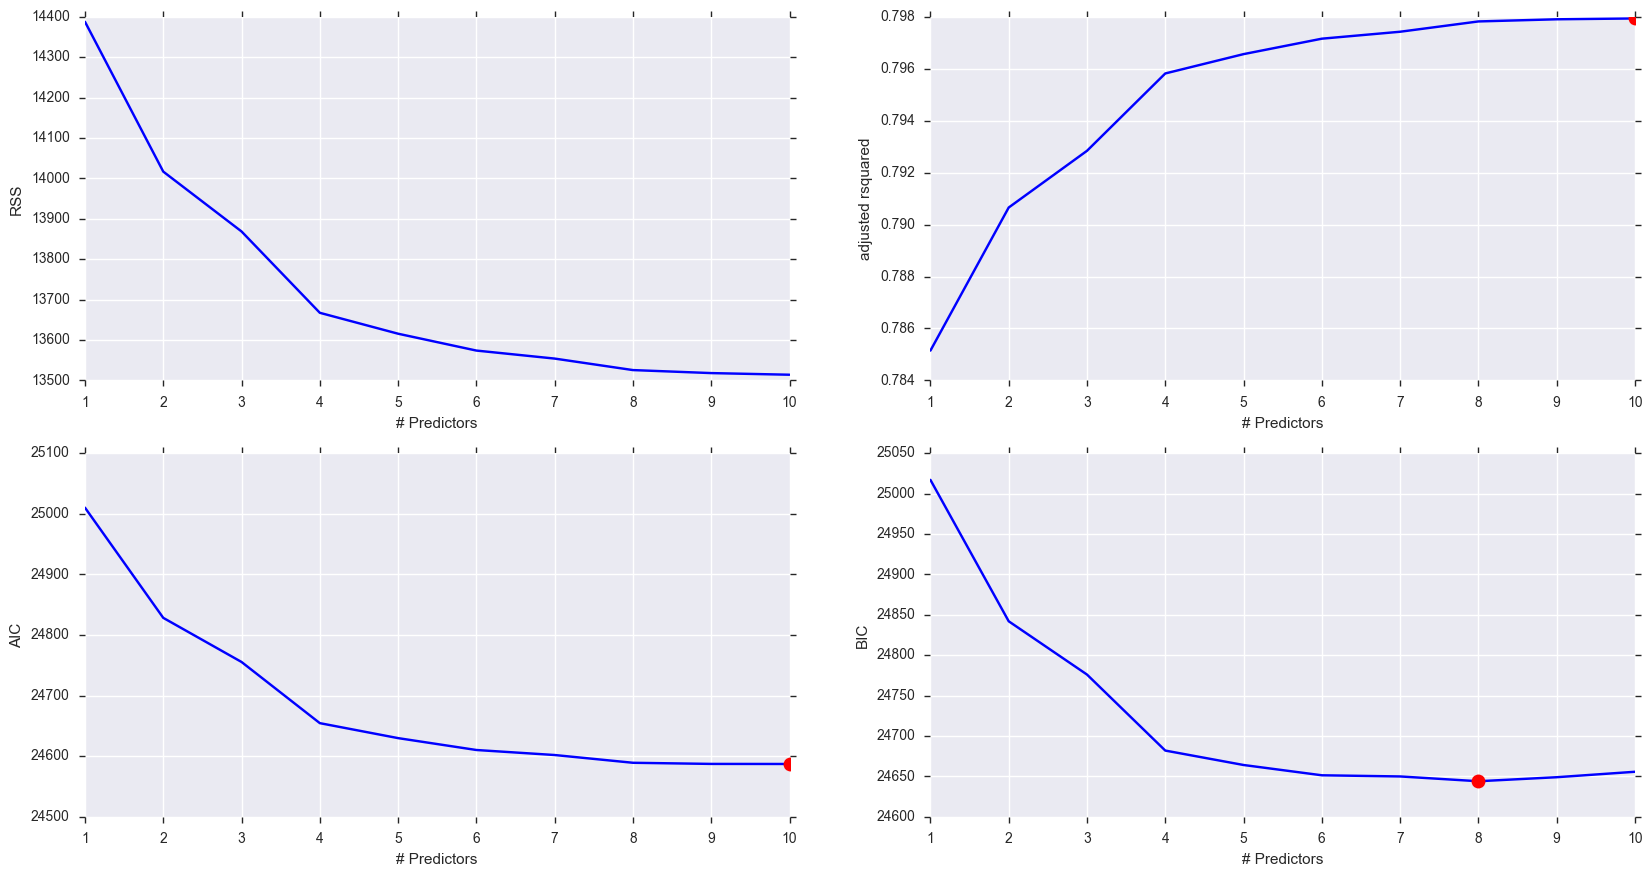

In [187]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [188]:
# Validation set approach
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [189]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [190]:
def forward(predictors, X_train, y_train, X_test, y_test):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [191]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train], X[test], y[test])
    predictors = models_train.loc[i]["model"].model.exog_names

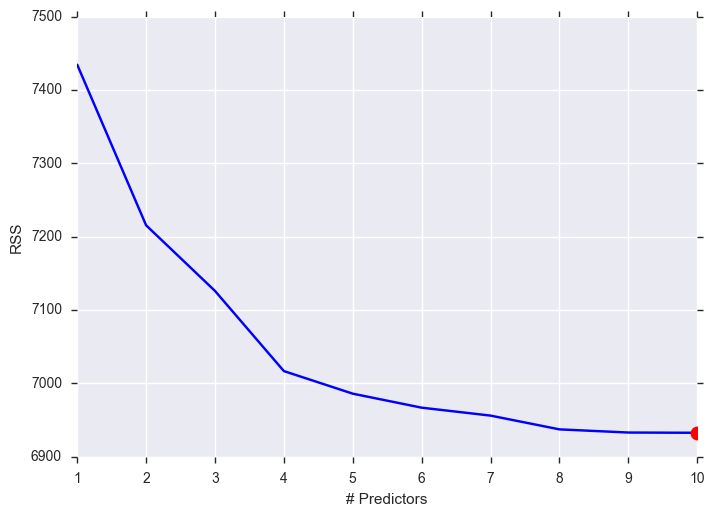

In [192]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), "or");

In [193]:
models_train

,RSS,model
1,7434.650023,<statsmodels.regression.linear_model.Regressio...
2,7215.661653,<statsmodels.regression.linear_model.Regressio...
3,7126.159991,<statsmodels.regression.linear_model.Regressio...
4,7016.845340,<statsmodels.regression.linear_model.Regressio...
5,6986.048246,<statsmodels.regression.linear_model.Regressio...
6,6966.957728,<statsmodels.regression.linear_model.Regressio...
7,6956.141593,<statsmodels.regression.linear_model.Regressio...
8,6937.370645,<statsmodels.regression.linear_model.Regressio...
9,6933.057650,<statsmodels.regression.linear_model.Regressio...
10,6932.709260,<statsmodels.regression.linear_model.Regressio...
